Оформляем единый github-репозиторий, в котором представлены результаты всех 5 лабораторных работ. Github-репозиторий должен обязательно содержать readme + jupyter-notebook, в котором даны комментарии к каждой ячейке с кодом.

**Лабораторная работа №1 (Проведение исследований с алгоритмом KNN)**

1.	Выбор начальных условий

a.	Выбрать набор данных для задачи классификации (у каждого студента должен быть уникальный набор данных) и обосновать его выбор (реальная практическая задача)  
b.	Выбрать набор данных для задачи регрессии классификации (у каждого студента должен быть уникальный набор данных) и обосновать его выбор (реальная практическая задача)  
c.	Выбрать метрики качества и обосновать их выбор  

2.	Создание бейзлайна и оценка качества

a.	Обучить модели из sklearn (для классификации и регрессии) для выбранных наборов данных  
b.	Оценить качество моделей (для классификации и регрессии) по выбранным метрикам на выбранных наборах данных  

3.	Улучшение бейзлайна

a.	Сформулировать гипотезы (препроцессинг данных, визуализация данных, формирование новых признаков, подбор гиперпараметров на кросс-валидации и т.д.)  
b.	Проверить гипотезы  
c.	Сформировать улучшенный бейзлайн по результатам проверки гипотез  
d.	Обучить модели с улучшенным бейзлайном (для классификации и регрессии) для выбранных наборов данных  
e.	Оценить качество моделей с улучшенным бейзлайном (для классификации и регрессии) по выбранным метрикам на выбранных наборах данных  
f.	Сравнить результаты моделей с улучшенным бейзлайном в сравнении с результатами из пункта 2   
g.	Сделать выводы  

4.	Имплементация алгоритма машинного обучения

a.	Самостоятельно имплементировать алгоритмы машинного обучения (для классификации и регрессии)  
b.	Обучить имплементированные модели (для классификации и регрессии) для выбранных наборов данных  
c.	Оценить качество имплементированных моделей (для классификации и регрессии) по выбранным метрикам на выбранных наборах данных  
d.	Сравнить результаты имплементированных моделей в сравнении с результатами из пункта 2   
e.	Сделать выводы  
f.	Добавить техники из улучшенного бейзлайна (пункт 3с)  
g.	Обучить модели (для классификации и регрессии) для выбранных наборов данных  
h.	Оценить качество моделей (для классификации и регрессии) по выбранным метрикам на выбранных наборах данных  
i.	Сравнить результаты моделей в сравнении с результатами из пункта 3  
j.	Сделать выводы  


**Лабораторная работа №2 (Проведение исследований с логистической и линейной регрессией)** – повтор пунктов 2-4 из лабораторной работы №1

**Лабораторная работа №3 (Проведение исследований с решающим деревом)** – повтор пунктов 2-4 из лабораторной работы №1

**Лабораторная работа №4 (Проведение исследований со случайным лесом)** – повтор пунктов 2-4 из лабораторной работы №1

**Лабораторная работа №5 (Проведение исследований с градиентным бустингом)** – повтор пунктов 2-4 из лабораторной работы №1 + подведение итогов / сравнение результатов, полученных всеми алгоритмами из лабораторных 1-5)


# **1. Выбор начальных условий**

*a. b. Выбор набора данных для задачи классификации и регрессии и обоснование его выбора (реальная практическая задача)*

**Выбор набора данных**: для задачи классификации и регрессии за основу был взят датасет с данными о ноутбуках, включая бренды, названия, объёмы памяяти, веса, место на диске, бренды процессора и видеокарты, а также названия операционной системы и их стоимость. С помощью регрессии можно предсказать точную стоимость ноутбука, а с помощью классификации разделить ноутбуки по ценовым классам с помощью метода квантилей, поскольку таким образом диапазон стоимостей будет разделён на более осмысленные группы, и размещение ноутбука в той или иной группе будет зависеть от его характеристик, что полезно в прикладных задачах. 

**Контекст задачи**: задача решает реально существующую бизнес-задачу, такую как: анализ цен на ноутбуки на рынке. Это нужно для выявления определённых закономерностей: зависимость стоимости от технического наполнения устройства. Эта задача является универсальной, поскольку мы разделяем товары по определённым ценовым диапазонам.

In [450]:
import pandas as pd

file_path = "../datasets/Ilo_laptop.csv"
df_raw = pd.read_csv(file_path)

df = df_raw.copy()

Предварительный анализ данных

In [451]:
# Размерности датасета

df.shape

(1273, 13)

В данном наборе данных 1273 экземпляров и 13 атрибутов.

Цена, будучи при этом одним из атрибутов, является целевой переменной, а остальные 12 атрибутов помогают сделать выводы о цене ноутбука.

In [452]:
# Просмотр датасета

df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [455]:
# Сводная информация о наборе данных

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


В данном наборе данных есть 8 числовых переменных и 5 категориальных переменных (в данный момент - object), которые преобразуем в численные. Также для задачи классификации будет добавлен целевой столбец  - 'Price class' для определения ценового диапазона ноутбука ('Low'/'Medium'/'High'/'Very high').

In [456]:
categorical_columns = ["Company", "TypeName", "Cpu_brand", "Gpu_brand", "Os"]
for col in categorical_columns:
  print(f'{col}: {df[col].nunique()}')

Company: 19
TypeName: 6
Cpu_brand: 5
Gpu_brand: 3
Os: 3


В данном случае применение Label Encoding более целесообразно, поскольку применение One-Hot Encoding при множественном кличестве уникальных элементов приведёт к кратному увеличению утрибутов.

In [457]:
from sklearn.preprocessing import LabelEncoder

# Кодирование категориальных переменных с использованием частоты
label_encoders = {}
categorical_columns = ["Company", "TypeName", "Cpu_brand", "Gpu_brand", "Os"]
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [458]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,1,4,8,1.37,11.175755,0,1,226.983005,2,0,128,1,0
1,1,4,8,1.34,10.776777,0,0,127.677940,2,0,0,1,0
2,7,3,8,1.86,10.329931,0,0,141.211998,2,0,256,1,1
3,1,4,16,1.83,11.814476,0,1,220.534624,3,0,512,0,0
4,1,4,8,1.37,11.473101,0,1,226.983005,2,0,256,1,0


In [460]:
# Разбиение на классы на основе квантилей
num_classes = 4
# num_classes = 2
borders = pd.qcut(df['Price'], q=num_classes, labels=False, retbins=True)[1]

# Новый список меток для классов
class_labels = ['Low', 'Medium', 'High', 'Very high']
# class_labels = ['Budget', 'Luxury']

# Функция для присвоения классов
def price_class(price):
    for i in range(1, num_classes+1):
        if price <= borders[i]:
            return class_labels[i-1]

# Применение функции к столбцу 'Price'
df["Price Class"] = df["Price"].apply(price_class)


In [461]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os,Price Class
0,1,4,8,1.37,11.175755,0,1,226.983005,2,0,128,1,0,High
1,1,4,8,1.34,10.776777,0,0,127.677940,2,0,0,1,0,Medium
2,7,3,8,1.86,10.329931,0,0,141.211998,2,0,256,1,1,Low
3,1,4,16,1.83,11.814476,0,1,220.534624,3,0,512,0,0,Very high
4,1,4,8,1.37,11.473101,0,1,226.983005,2,0,256,1,0,Very high


In [462]:
# Сводная статистика в числовых переменных

print(round(df.describe(),2))

       Company  TypeName      Ram   Weight    Price  TouchScreen      Ips  \
count  1273.00   1273.00  1273.00  1273.00  1273.00      1273.00  1273.00   
mean      6.46      2.58     8.45     2.04    10.83         0.15     0.28   
std       4.09      1.25     5.10     0.67     0.62         0.35     0.45   
min       0.00      0.00     2.00     0.69     9.13         0.00     0.00   
25%       4.00      1.00     4.00     1.50    10.39         0.00     0.00   
50%       7.00      3.00     8.00     2.04    10.87         0.00     0.00   
75%      10.00      3.00     8.00     2.31    11.29         0.00     1.00   
max      18.00      5.00    64.00     4.70    12.69         1.00     1.00   

           Ppi  Cpu_brand      HDD      SSD  Gpu_brand       Os  
count  1273.00    1273.00  1273.00  1273.00    1273.00  1273.00  
mean    146.95       2.43   413.72   186.25       1.17     1.85  
std      42.93       0.98   518.05   186.53       0.65     0.40  
min      90.58       0.00     0.00     0.0

*c. Выбор меток качества и обоснование их выбора*

Для задачи **классификации**:

**Accuracy (Точность)**: позволяет отследить процент правильных предсказаний модели от общего числа. Помогает оценить общую эффективность классификатора, а также сделать правильные выводы, когда классы сбалансированы.

**Balanced Accuracy (Сбалансированная точность)**: Позволяет рассчитать среднее значение точности для каждого класса отдельно, учитывая дисбаланс классов. Используется, когда классы имеют неравномерное распределение, чтобы избежать искажения результатов, характерных для обычной точности.

Для задачи **регрессии**:

**MAE (Средняя абсолютная ошибка)**: позволяет оценить среднее абсолютное отклонение предсказанных значений от истинных. MAE помогает просто измерить  насколько предсказания отклоняются от реальных значений без учета положительности или отрицательности их направления.

**MAPE (Средняя абсолютная процентная ошибка)**: метрическая ошибка в процентах. MAPE позволяет удобно сравнивать ошибки на разных масштабах данных, а также сделать правильные выводы, когда важен масштаб ошибки относительно величины предсказания.

**MSE (Среднеквадратичная ошибка)**: метрика средней квадратичной ошибки между предсказанными и реальными значениями. Квадратично накапливает отклонения, поэтому более чувствительна к большим ошибкам. MSE позволяет сделать правильные выводы в задачах, где важно минимизировать большие ошибки.

**RMSE (Квадратный корень из среднеквадратичной ошибки)**: метрика, являющаяся корнем из MSE, позволяет вернуть ошибку в ту же единицу измерения, что и данные. RMSE предоставляет более интерпретируемую метрику и позволяет сделать правильные выводы в задачах, где важно минимизировать большие отклонения.

# Функции отрисовки

In [466]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Диаграмма рассеяния: тестовая выборка
def plot_scattering_diagram(y_true, y_pred):
  plt.figure(figsize=(8, 6))
  plt.scatter(y_true, y_pred, color='blue', label='Предсказания')
  plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2, label='Идеальная линия')
  plt.xlabel("Фактические значения")
  plt.ylabel("Предсказанные значения")
  plt.title("Сравнение фактических и предсказанных значений (Тестовая выборка)")
  plt.legend()
  plt.show()

# Матрица ошибок
def plot_confusion_matrix(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)

  # Метки классов
  class_names = ['Класс 1', 'Класс 2', 'Класс 3', 'Класс 4']
  # class_names = ['Budget', 'Luxury']
  # График
  plt.figure(figsize=(10, 7))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=class_names, yticklabels=class_names)

  plt.ylabel('Настоящий класс')
  plt.xlabel('Предсказанный класс')
  plt.title('Матрица ошибок')
  plt.show()

# Качество классификации
def evaluate_classification(y_test, y_pred, comment):
  accuracy = accuracy_score(y_test, y_pred)
  balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

  print(comment)
  print(f'Accuracy = {accuracy}')
  print(f'Balanced accuracy = {balanced_accuracy}')

# Качество регрессии
def evaluate_regression(y_test, y_pred, comment):

    # Расчет MAPE
    def mean_absolute_percentage_error(y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Расчет RMSE
    def root_mean_squared_error(y_true, y_pred):
        return np.sqrt(mean_squared_error(y_true, y_pred))

    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)

    print(comment)
    print(f'MAE = {mae:.4f}')
    print(f'MAPE = {mape:.4f}%')
    print(f'MSE = {mse:.4f}')
    print(f'RMSE = {rmse:.4f}')

# **Лабораторная работа 1**

# **Проведение исследований с алгоритмом KNN**

## **2. Создание бейзлайна и оценка качества**

In [467]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [468]:
df_base = df.copy()

### Классификация

#### **a. Обучение модели из sklearn для выбранного набора данных**

In [469]:
# Разделение данных для классификации
X_classification_base = df_base.drop(["Price", "Price Class"], axis=1)
y_classification_base = df_base["Price Class"]
X_train_cls_base, X_test_cls_base, y_train_cls_base, y_test_cls_base = train_test_split(
    X_classification_base, y_classification_base, test_size=0.2, random_state=42
)


scaler = StandardScaler() # Стандартизация данных
# scaler = MinMaxScaler() # Нормализация данных
X_train_cls_scaled_base = scaler.fit_transform(X_train_cls_base)
X_test_cls_scaled_base = scaler.transform(X_test_cls_base)

# Обучение модели классификации
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_cls_scaled_base, y_train_cls_base)

KNeighborsClassifier(n_neighbors=3)

#### **b. Оценка качества модели по выбранным метрикам на выбранном наборе данных**

In [470]:
y_test_pred_cls_base = knn_classifier.predict(X_test_cls_scaled_base)
y_train_pred_cls_base = knn_classifier.predict(X_train_cls_scaled_base)

# Вывод результатов
evaluate_classification(y_test_cls_base, y_test_pred_cls_base, 'Оценка на валидационной выборке:')

print()

evaluate_classification(y_train_cls_base, y_train_pred_cls_base, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
Accuracy = 0.6588235294117647
Balanced accuracy = 0.6529641888707298

Оценка на тренировочной выборке:
Accuracy = 0.8487229862475442
Balanced accuracy = 0.8489352899248435


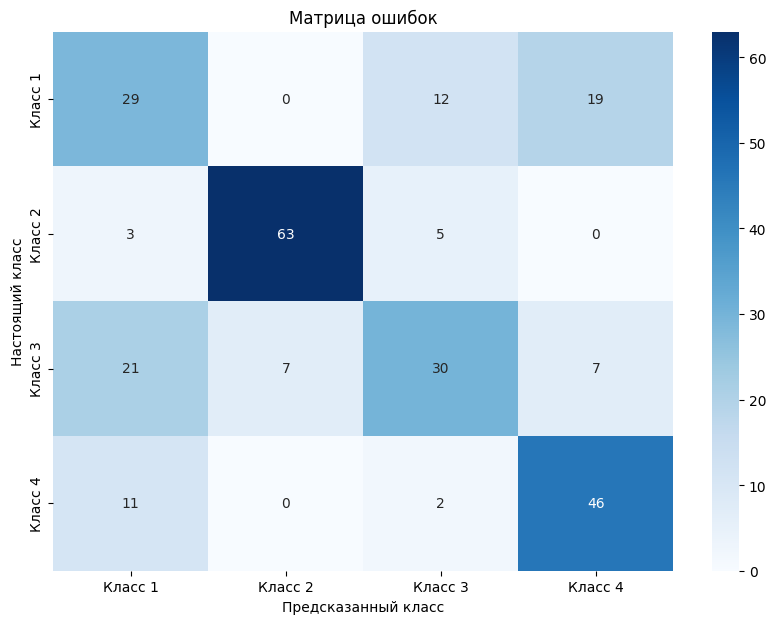

In [471]:
# Матрица ошибок
plot_confusion_matrix(y_test_cls_base, y_test_pred_cls_base)

**Точность модели (Accuracy)** на валидационной выборке составляет 65.88% - достаточно высокая точность при предсказании одного из 4 классов.

In [472]:
# Проверка нулевой оценки точности

null_accuracy_base = (y_test_cls_base.value_counts().max()/y_test_cls_base.value_counts().sum())
print('Null accuracy score: {0:0.4f}'. format(null_accuracy_base))

Null accuracy score: 0.2784


Показатель точности модели составляет 0,6588, а нулевой показатель точности составляет 0,2784. Можно сделать вывод, что модель K ближайших соседей хорошо справляется с предсказанием меток ценовых классов.

### *Регрессия*

#### **a. Обучение модели из sklearn для выбранного набора данных**

In [473]:
# Разделение данных для регрессии
X_regression_base = df_base.drop(['Price', 'Price Class'], axis=1)
y_regression_base = df_base["Price"]
X_train_reg_base, X_test_reg_base, y_train_reg_base, y_test_reg_base = train_test_split(
    X_regression_base, y_regression_base, test_size=0.2, random_state=42
)

scaler = StandardScaler() # Стандартизация данных
# scaler = MinMaxScaler() # Нормализация данных
X_train_reg_scaled_base = scaler.fit_transform(X_train_reg_base)
X_test_reg_scaled_base = scaler.transform(X_test_reg_base)

# Обучение модели регрессии
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train_reg_scaled_base, y_train_reg_base)

KNeighborsRegressor(n_neighbors=3)

#### **b. Оценка качества модели по выбранным метрикам на выбранном наборе данных**

In [474]:
y_test_pred_reg_base = knn_regressor.predict(X_test_reg_scaled_base)
y_train_pred_reg_base = knn_regressor.predict(X_train_reg_scaled_base)

# Вывод результатов
evaluate_regression(y_test_reg_base, y_test_pred_reg_base, 'Оценка на валидационной выборке:')

print()

evaluate_regression(y_train_reg_base, y_train_pred_reg_base, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
MAE = 0.2174
MAPE = 2.0093%
MSE = 0.0879
RMSE = 0.2964

Оценка на тренировочной выборке:
MAE = 0.1318
MAPE = 1.2161%
MSE = 0.0309
RMSE = 0.1758


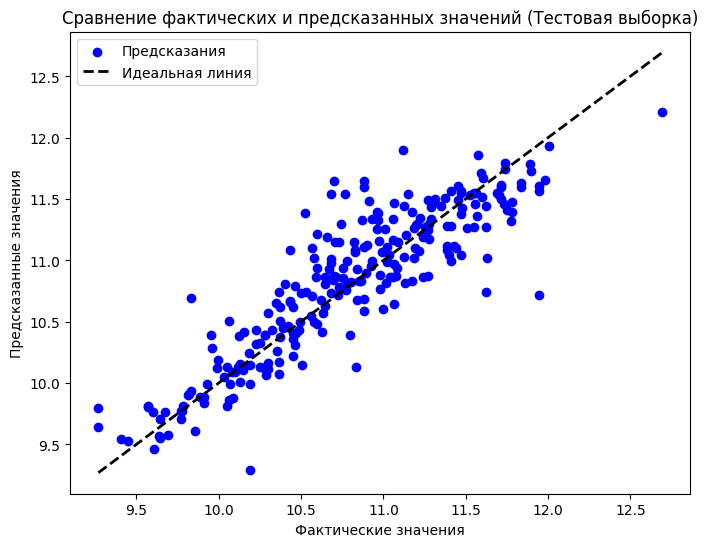

In [475]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_base, y_test_pred_reg_base)

MAPE (2.0093%) на валидационной выборке и MAE (0.2174) достаточно низкие, что говорит о том, что модель может быть использована для решения задач с определённой погрешностью.

## **3. Улучшение бейзлайна**

In [476]:
df_optimized = df.copy()

**a. b. c. Формирование гипотез и их проверка, а также формирование улучшенного бейзлайна по результатам проверки гипотез (препроцессинг данных, визуализация данных, формирование новых признаков, подбор гиперпараметров на кросс-валидации)**

**Препроцессинг данных**

In [477]:
# Количество пустых значений в каждой характеристике
df_optimized.isna().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
Price Class    0
dtype: int64

Пустых значений нет

In [478]:
# Количество каждых значений
df_optimized.nunique()

Company         19
TypeName         6
Ram              9
Weight         171
Price          791
TouchScreen      2
Ips              2
Ppi             39
Cpu_brand        5
HDD              6
SSD             13
Gpu_brand        3
Os               3
Price Class      4
dtype: int64

In [479]:
# Основные характеристики
df_optimized.describe().round(2)

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
count,1273.00,1273.00,1273.00,1273.00,1273.00,1273.00,1273.00,1273.00,1273.00,1273.00,1273.00,1273.00,1273.00
mean,6.46,2.58,8.45,2.04,10.83,0.15,0.28,146.95,2.43,413.72,186.25,1.17,1.85
std,4.09,1.25,5.10,0.67,0.62,0.35,0.45,42.93,0.98,518.05,186.53,0.65,0.40
min,0.00,0.00,2.00,0.69,9.13,0.00,0.00,90.58,0.00,0.00,0.00,0.00,0.00
25%,4.00,1.00,4.00,1.50,10.39,0.00,0.00,127.34,2.00,0.00,0.00,1.00,2.00
50%,7.00,3.00,8.00,2.04,10.87,0.00,0.00,141.21,3.00,0.00,256.00,1.00,2.00
75%,10.00,3.00,8.00,2.31,11.29,0.00,1.00,157.35,3.00,1000.00,256.00,2.00,2.00
max,18.00,5.00,64.00,4.70,12.69,1.00,1.00,352.47,4.00,2000.00,1024.00,2.00,2.00


In [480]:
# Количество дубликатов
df_optimized[df_optimized.duplicated()]

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os,Price Class
1004,16,3,4,1.2,11.061462,0,0,165.632118,2,0,128,1,2,High


In [481]:
# Удаление дубликатов
df_optimized = df_optimized.drop_duplicates()

In [482]:
df_optimized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0 to 1272
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1272 non-null   int64  
 1   TypeName     1272 non-null   int64  
 2   Ram          1272 non-null   int64  
 3   Weight       1272 non-null   float64
 4   Price        1272 non-null   float64
 5   TouchScreen  1272 non-null   int64  
 6   Ips          1272 non-null   int64  
 7   Ppi          1272 non-null   float64
 8   Cpu_brand    1272 non-null   int64  
 9   HDD          1272 non-null   int64  
 10  SSD          1272 non-null   int64  
 11  Gpu_brand    1272 non-null   int64  
 12  Os           1272 non-null   int64  
 13  Price Class  1272 non-null   object 
dtypes: float64(3), int64(10), object(1)
memory usage: 149.1+ KB


**Визуализация данных**

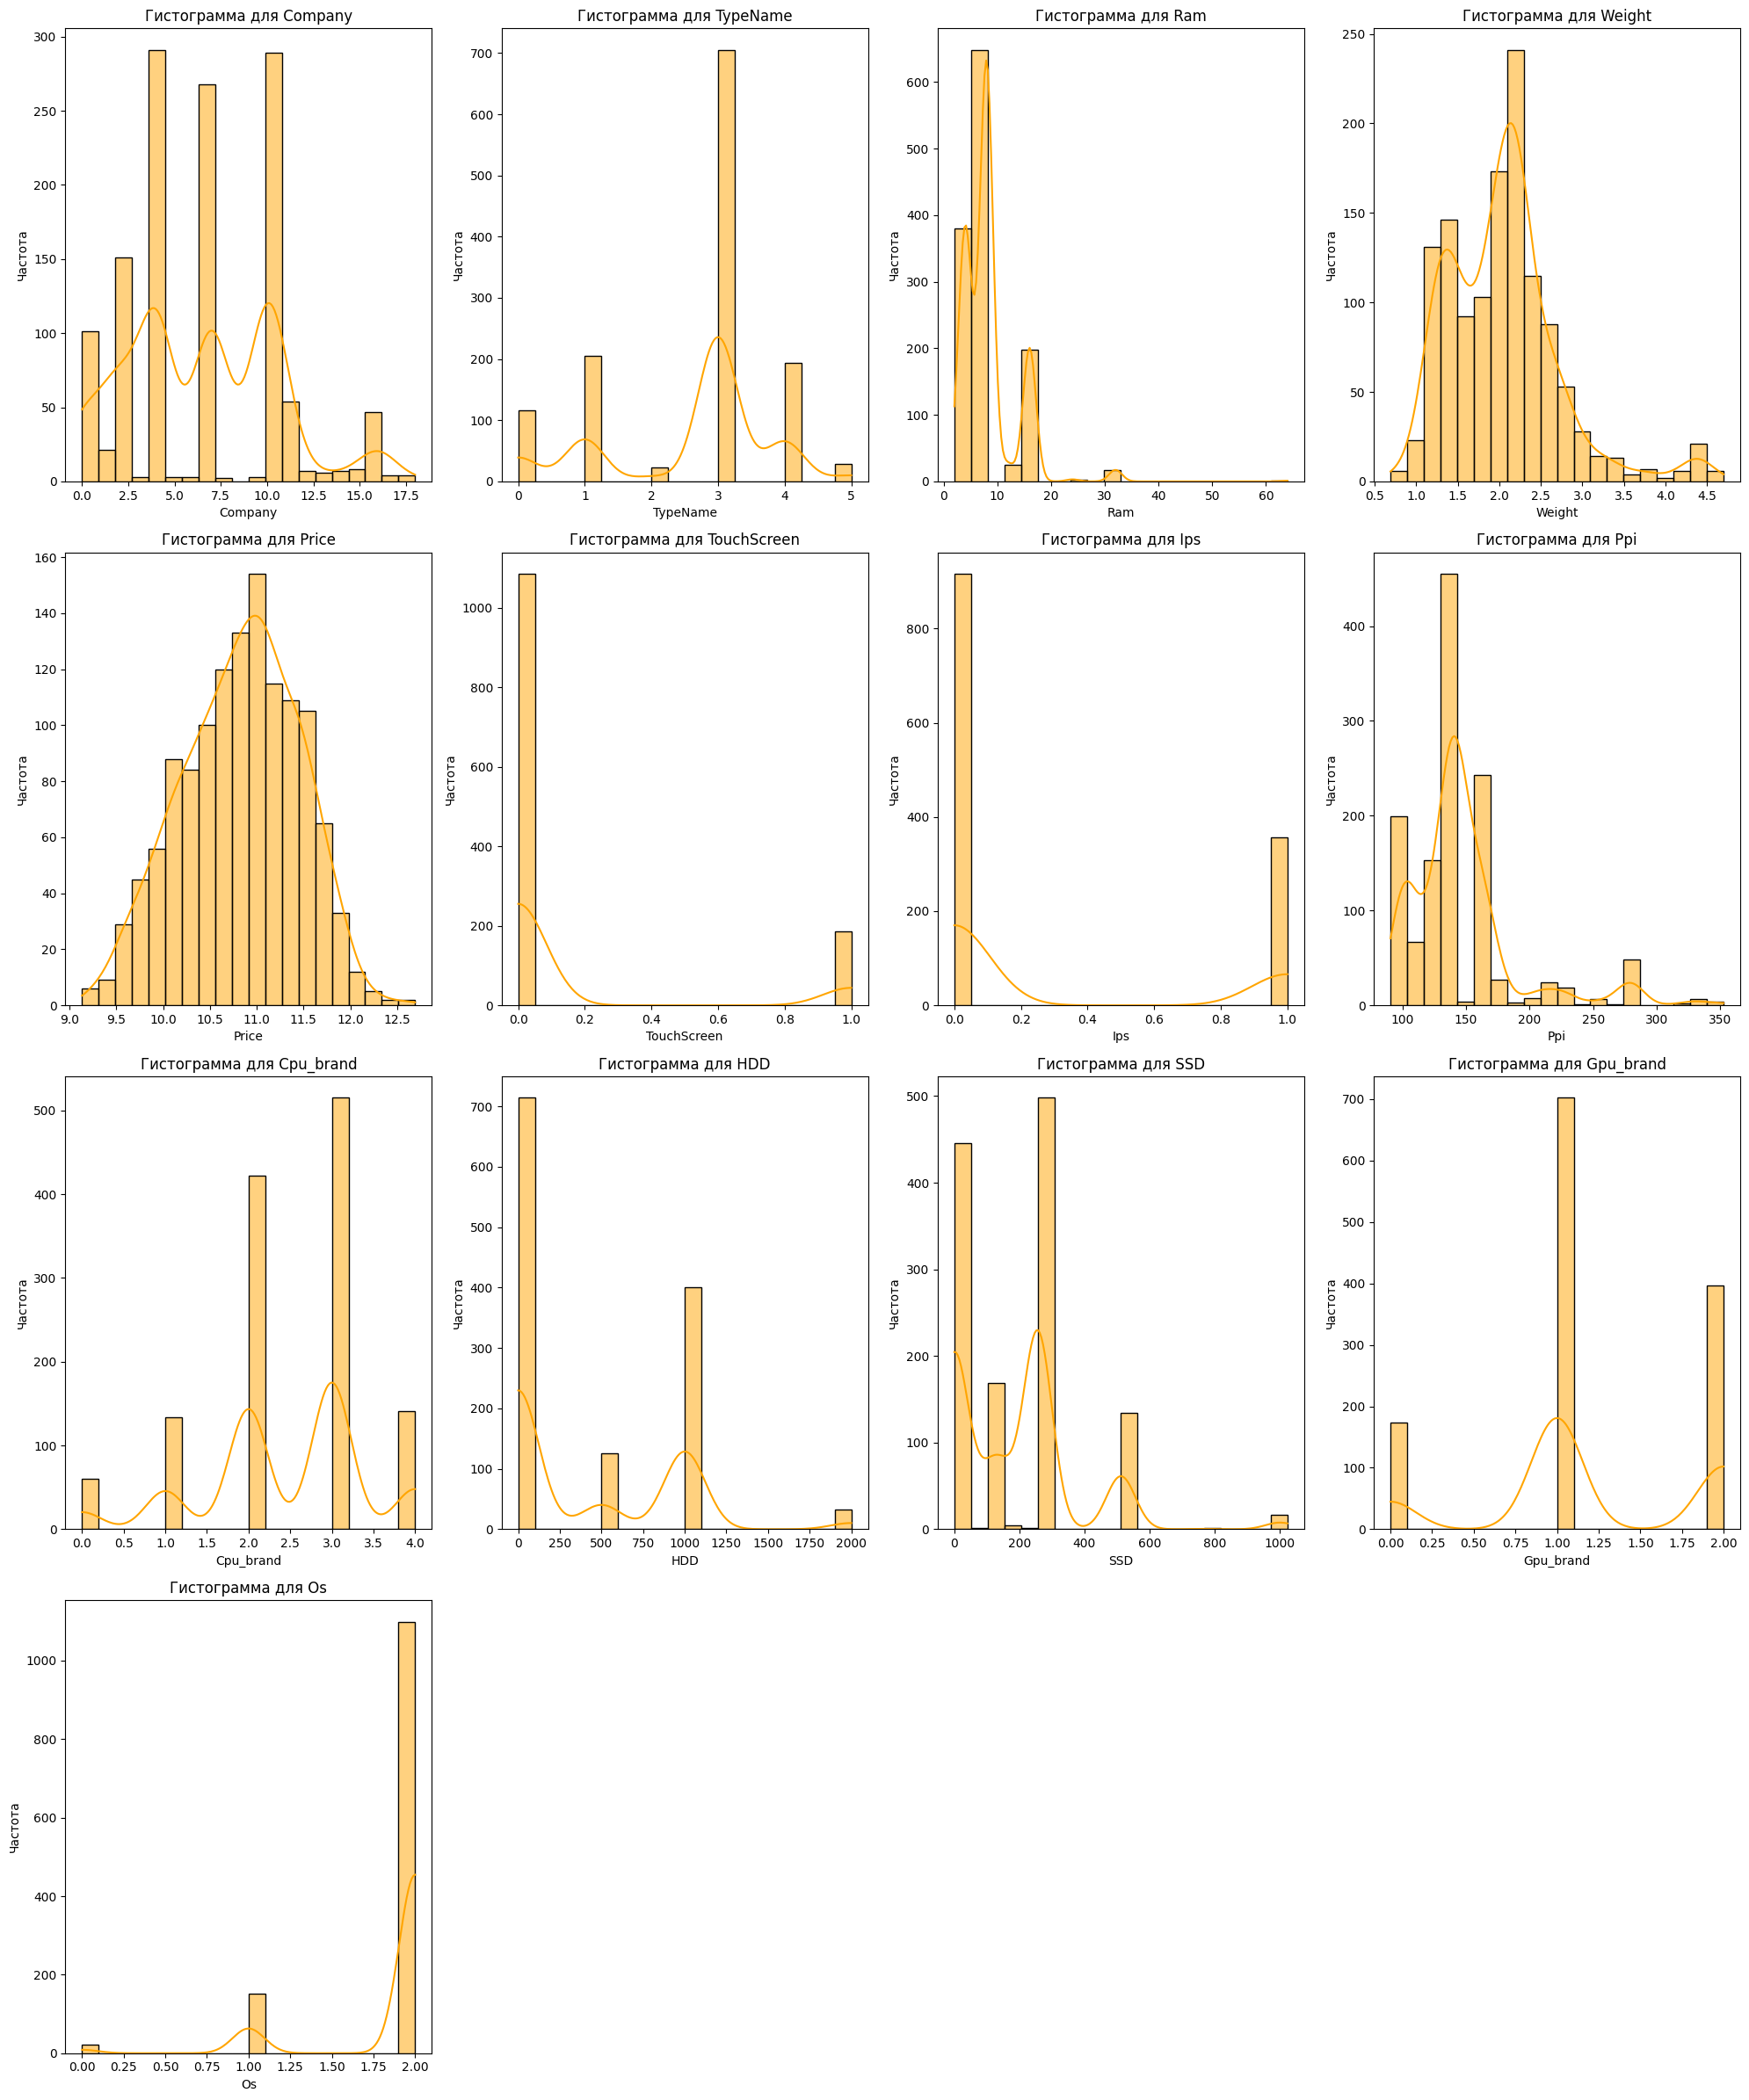

In [483]:
# Анализ распределения

import matplotlib.pyplot as plt
import seaborn as sns

# Числовые столбцы для визуализации
numerical_columns = df_optimized.select_dtypes(include=['number']).columns

# Кколичество столбцов для графиков
n_cols = 4
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Количество строк для графиков

# Создание графиков
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))
axes = axes.flatten()

# Построение гистограмм с KDE для числовых столбцов
for idx, col in enumerate(numerical_columns):
    sns.histplot(df_optimized[col], kde=True, ax=axes[idx], color='orange', bins=20)
    axes[idx].set_title(f'Гистограмма для {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Частота')

# Удаление пустых осей, если их больше, чем нужных
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


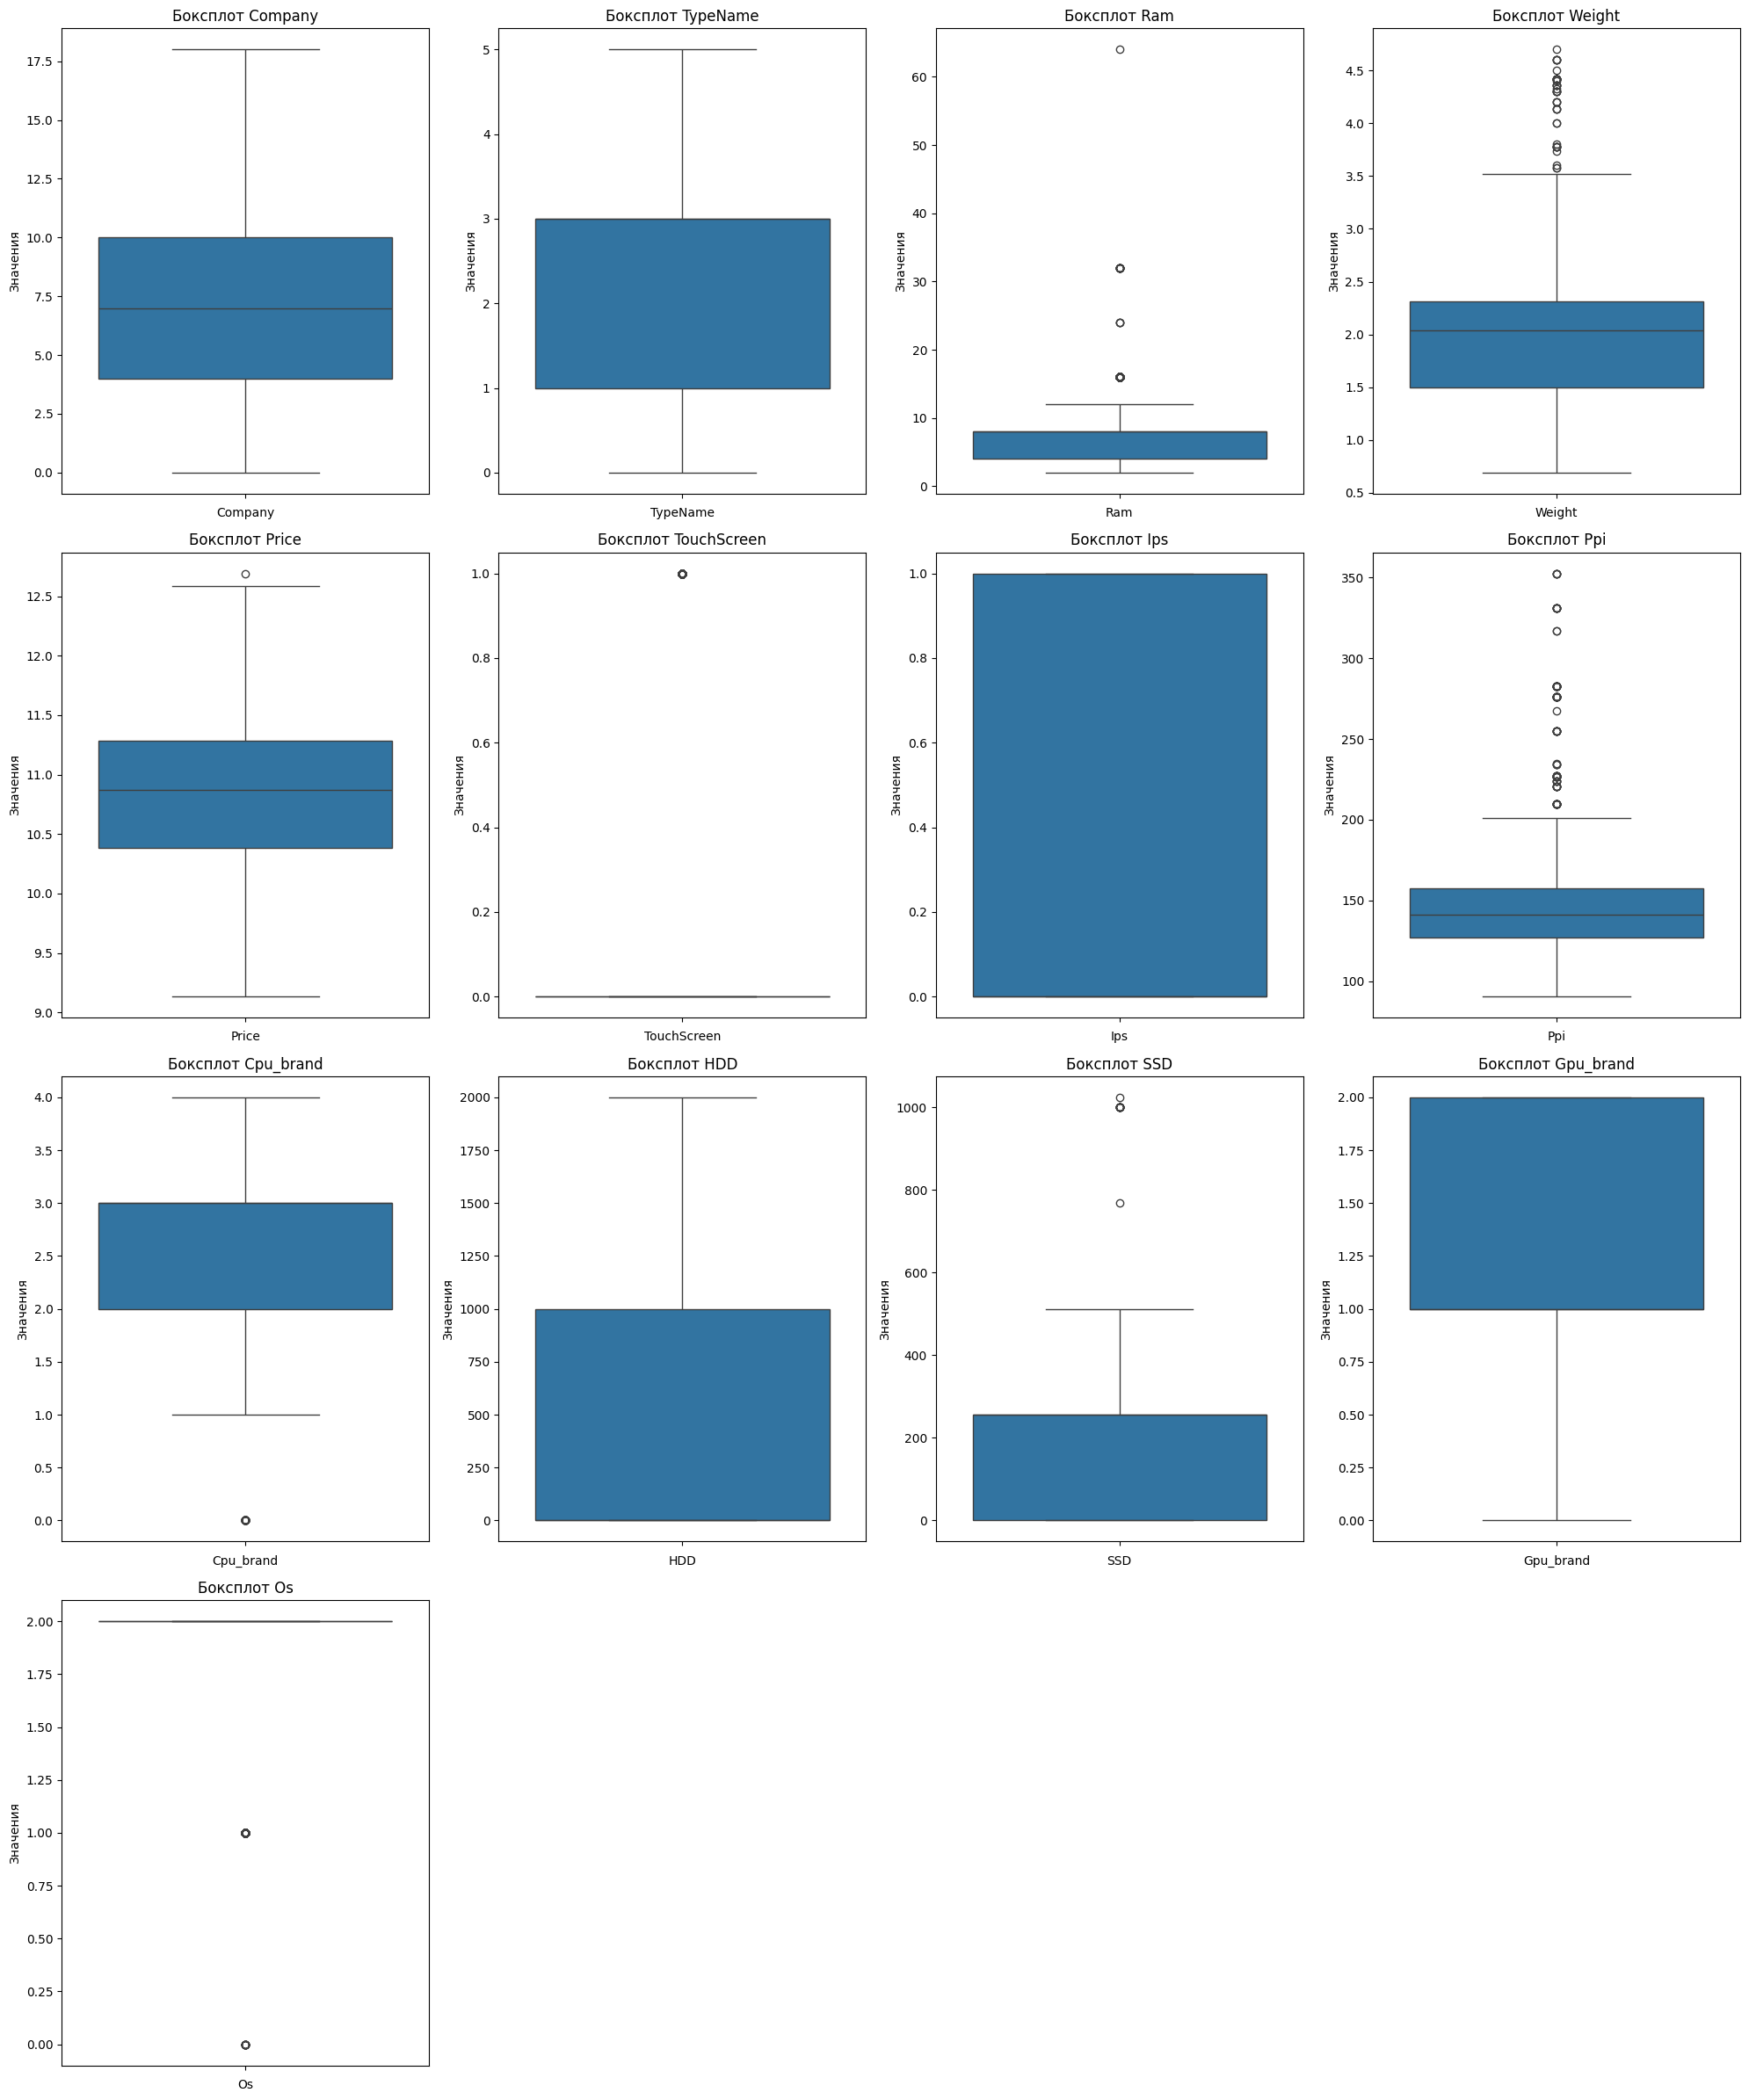

In [484]:
# Анализ наличия выбросов

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))
axes = axes.flatten()

# Числовые столбцы для визуализации
numerical_columns = df_optimized.select_dtypes(include=['number']).columns

for idx, col in enumerate(numerical_columns):
    sns.boxplot(y=df_optimized[col], ax=axes[idx])
    axes[idx].set_title(f'Боксплот {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Значения')

for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Выбросы есть у нескольких атрибутов.

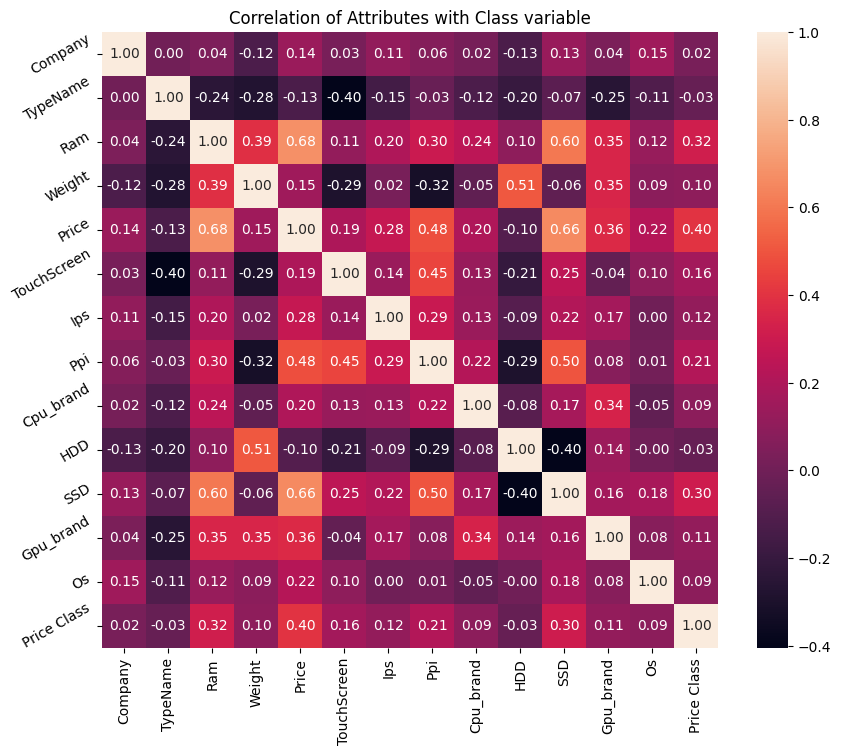

In [485]:
# Анализ корреляции данных между собой, чтобы предположить дальнейшие шаги по работе с данными



df_temp = df_optimized.copy()

# Преобразование категориального столбца 'Price Class' в числовой (например, через Label Encoding)
label_encoder = LabelEncoder()

df_temp['Price Class'] = label_encoder.fit_transform(df_temp['Price Class'])

# Матрица корреляций
correlation = df_temp.corr()

plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

По данным из корреляционной матрицы можно заметить следующее:

- с Price Class хорошо коррелируют Ram, SSD, Ppi, отрицательно коррелирует HDD, и вообще не вносят информации Weight, Os

- Price отлично коррелируют Ram, SSD, хорошо коррелирует Ppi, отрицательно коррелирует HDD, и не вносят никакой информации Weight, Os

- SSD и Ram хорошо коррелируют друг с другом.

Можно предположить, что стоит удалить столбцы Weight, Os, добавить новый параметр SSD_per_Ppi, удалив Ppi, поскольку он имеет меньшую корреляцию, а 
для HDD заменить labelEncoding в Brand на FrequencyEncoding.

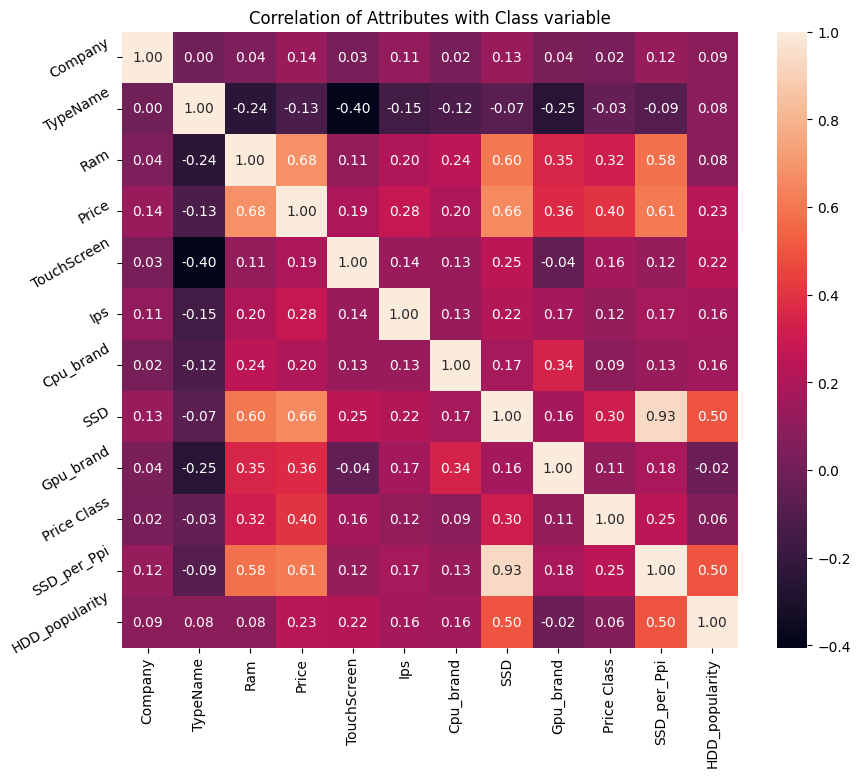

In [486]:
# Создание нового признака: отношение SSD к Ppi
df_temp['SSD_per_Ppi'] = df_temp['SSD'] / df_temp['Ppi']

# Добавление перекодированного признака: популярность HDD
HDD_popularity = df_temp['HDD'].value_counts(normalize=True)
df_temp['HDD_popularity'] = df_temp['HDD'].map(HDD_popularity)

# Удаление столбцов 'Weight', 'Os', 'Ppi', 'HDD'
df_temp = df_temp.drop(columns=['Weight', 'Os', 'Ppi', 'HDD'])

# Матрица корреляций
correlation = df_temp.corr()

plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

Из новой корреляционной матрицы видно, что SSD_per_Ppi имеет большую корреляцию с Price и с Price Class по сравнению с Ppi, а HDD_popularity имеет положительную корреляцию с Price и Price Class.

### *Классификация*

**d. Обучение модели с улучшенным бейзлайном на выбранном наборе данных**

In [487]:
df_optimized = df_temp

# Подготовка данных для классификации
X_classification_optimized = df_optimized.drop(columns=['Price', 'Price Class'], axis=1)
y_classification_optimized = df_optimized['Price Class']

# Разделение на тренировочную и тестовую выборки
X_train_cls_optimized, X_test_cls_optimized, y_train_cls_optimized, y_test_cls_optimized = train_test_split(
    X_classification_optimized, y_classification_optimized, test_size=0.2, random_state=42
)


scaler = StandardScaler() # Стандартизация данных
# scaler = MinMaxScaler() # Нормализация данных
X_train_cls_scaled_optimized  = scaler.fit_transform(X_train_cls_optimized)
X_test_cls_scaled_optimized  = scaler.transform(X_test_cls_optimized)

# Обучение модели классификации KNN
knn_classifier = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_classifier.fit(X_train_cls_scaled_optimized, y_train_cls_optimized)

KNeighborsClassifier(n_neighbors=3, weights='distance')

**e.	Оценка качества моделей с улучшенным бейзлайном по выбранным метрикам на выбранных наборах данных**

In [489]:
# Оценка модели классификации
y_pred_train_cls_optimized = knn_classifier.predict(X_train_cls_scaled_optimized)
y_pred_test_cls_optimized = knn_classifier.predict(X_test_cls_scaled_optimized)

# Вывод результатов
evaluate_classification(y_test_cls_optimized, y_pred_test_cls_optimized, 'Оценка на валидационной выборке:')

print()

evaluate_classification(y_train_cls_optimized, y_pred_train_cls_optimized, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
Accuracy = 0.7019607843137254
Balanced accuracy = 0.705898903557225

Оценка на тренировочной выборке:
Accuracy = 0.9105211406096362
Balanced accuracy = 0.9095134044646735


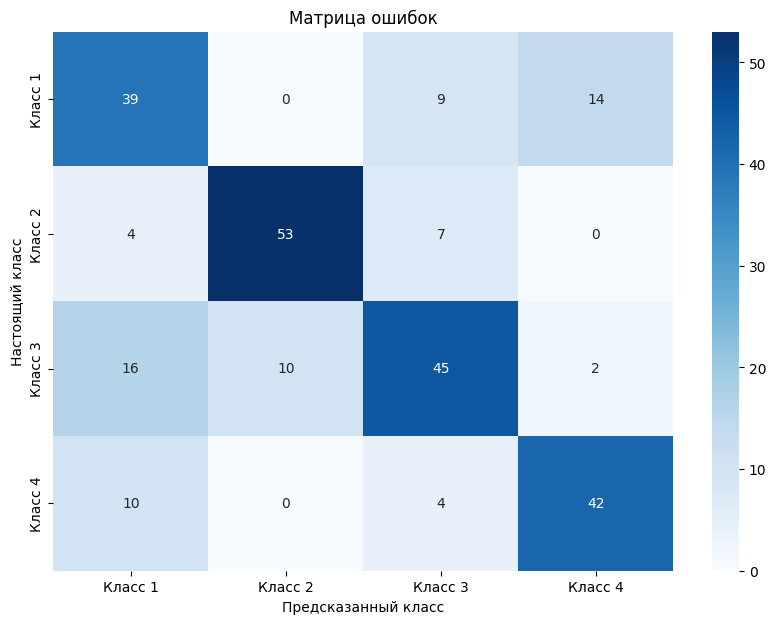

In [490]:
# Матрица ошибок
plot_confusion_matrix(y_test_cls_optimized, y_pred_test_cls_optimized)

**f.	Сравнить результаты моделей с улучшенным бейзлайном в сравнении с результатами из пункта 2**

Можно заметить, что на валидационной выборке после улучшения бейзлайна модель стала работать примерно на 5%, а на тренировочной выборке  примерно на 7% точнее.

**g.	Сделать выводы**

Из проделанных действий и полученных результатов можно сделать вывод, что дублирующие данные, а также данные с низкой корреляцией относительно целевых столбцов и применение labelEncoder к столбцу HDD - всё это мешало модели и понижало точность, а все исправления в совокупности помогли KNN обучиться правильнее и с большей точностью предсказывать ценовой класс ноутбука.

### *Регрессия*

**d. Обучение модели с улучшенным бейзлайном на выбранном наборе данных**

In [491]:
# Разделение данных для регрессии
X_regression_optimized = df_optimized.drop(['Price', 'Price Class'], axis=1)
y_regression_optimized = df_optimized["Price"]
X_train_reg_optimized, X_test_reg_optimized, y_train_reg_optimized, y_test_reg_optimized = train_test_split(
    X_regression_optimized, y_regression_optimized, test_size=0.2, random_state=42
)


scaler = StandardScaler() # Стандартизация
# scaler = MinMaxScaler() # Нормализация данных
X_train_reg_scaled_optimized = scaler.fit_transform(X_train_reg_optimized)
X_test_reg_scaled_optimized = scaler.transform(X_test_reg_optimized)

# Обучение модели регрессии
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train_reg_scaled_optimized, y_train_reg_optimized)

KNeighborsRegressor(n_neighbors=3)

**e.	Оценка качества моделей с улучшенным бейзлайном по выбранным метрикам на выбранных наборах данных**

In [494]:
# Расчёт MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Расчёт RMSE
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

y_test_pred_reg_optimized = knn_regressor.predict(X_test_reg_scaled_optimized)
y_train_pred_reg_optimized = knn_regressor.predict(X_train_reg_scaled_optimized)

# Вывод результатов
evaluate_regression(y_test_reg_optimized, y_test_pred_reg_optimized, 'Оценка на валидационной выборке:')

print()

evaluate_regression(y_train_reg_optimized, y_train_pred_reg_optimized, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
MAE = 0.2163
MAPE = 1.9984%
MSE = 0.0801
RMSE = 0.2830

Оценка на тренировочной выборке:
MAE = 0.1579
MAPE = 1.4562%
MSE = 0.0439
RMSE = 0.2094


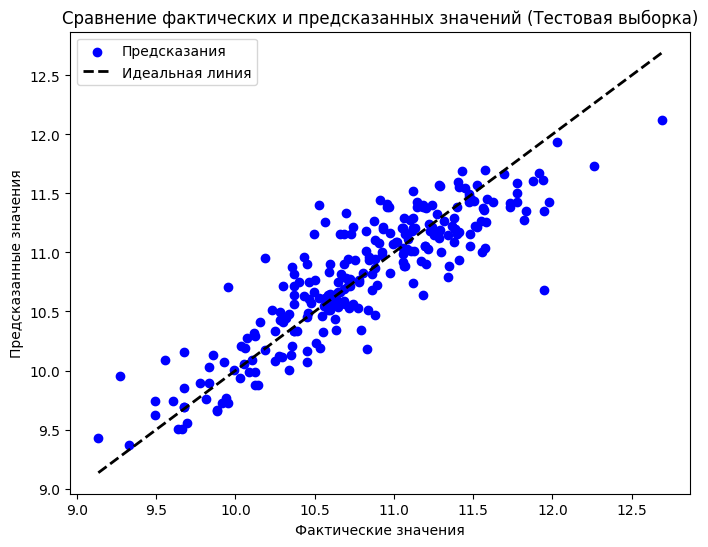

In [493]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_optimized, y_test_pred_reg_optimized)


**f.	Сравнить результаты моделей с улучшенным бейзлайном в сравнении с результатами из пункта 2**

На улучшенном бейзлайне модель показала следующие улучшения:

MAE уменьшилась с 0.2174 до 0.2163, что говорит о том, что в среднем ошибки предсказания стали меньше.

MAPE снизилась с 2.0093% до 1.9984%, что говорит о том, что модель стала предсказывать значения с меньшей относительной ошибкой.

MSE уменьшилась с 0.0879 до 0.0801, что подтверждает уменьшение величины ошибок, особенно крупных.

RMSE снизился с 0.2964 до 0.2830, что также подтверждает снижение ошибок, особенно в больших значениях.
Подводя итоги, можно сказать, что модель на улучшенном бейзлайне показала увеличение точности предсказаний во всех метриках и графики рассеиваний указывают на то что стало меньше выбросов и само множество точек стало более кучно располагаться около идеальной линии.

**g.	Сделать выводы**

Из проделанных действий и полученных результатов можно сделать вывод, что дублирующие данные, а также данные с низкой корреляцией относительно целевых столбцов и применение labelEncoder к столбцу HDD - всё это мешало модели и понижало точность, а все исправления в совокупности помогли KNN обучиться правильнее и с большей точностью предсказывать ценовой класс ноутбука.

## **4.	Имплементация алгоритма машинного обучения**

**a. Самостоятельно имплементировать алгоритмы машинного обучения (для классификации и регрессии)**

In [495]:
from collections import Counter

# KNN для классификации и регрессии
def KNN(X_train, X_test, y_train, y_test=None, k=3, p=2, task='regression'):
    """
    Универсальная реализация KNN для классификации и регрессии.

    Parameters:
    X_train (ndarray): Массив обучающих данных.
    X_test (ndarray): Массив тестовых данных.
    y_train (ndarray): Массив целевых значений для обучающих данных.
    y_test (ndarray, optional): Массив целевых значений для тестовых данных.
    k (int): Количество ближайших соседей.
    p (int): Порядок нормы для вычисления расстояний.
    task (str): 'classification' или 'regression'.

    Returns:
    y_pred (ndarray): Предсказания для тестовых данных.
    metrics (dict): Метрики точности (если предоставлены y_test).
    """
    # Преобразование данных в numpy массивы
    X_train, X_test, y_train = map(np.array, (X_train, X_test, y_train))

    # Расстояния от каждого тестового примера до всех обучающих
    distances = np.linalg.norm(X_test[:, np.newaxis] - X_train, axis=2, ord=p)

    # Для каждого тестового примера выбор индексов k ближайших соседей
    nearest_neighbors_indices = np.argsort(distances, axis=1)[:, :k]

    # Значения y_train для ближайших соседей
    nearest_neighbors_values = y_train[nearest_neighbors_indices]

    # Классификация или регрессия
    if task == 'classification':
        # Голосование за самый популярный класс
        y_pred = np.array([
            Counter(neighbors).most_common(1)[0][0] for neighbors in nearest_neighbors_values
        ])
    elif task == 'regression':
        # Выбор среднего значения
        y_pred = np.mean(nearest_neighbors_values, axis=1)
    else:
        raise ValueError("task должен быть 'classification' или 'regression'.")

    return y_pred

#### *Классификация*

**b. Обучить имплементированную модель для выбранного набора данных**

In [496]:
y_pred_base = KNN(X_train_cls_scaled_base, X_test_cls_scaled_base,
             y_train_cls_base, y_test_cls_base, k=3, p=2, task='classification')

**c. Оценить качество имплементированной модели по выбранным метрикам на выбранном наборе данных**

In [497]:
evaluate_classification(y_test_cls_base, y_pred_base, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
Accuracy = 0.6627450980392157
Balanced accuracy = 0.6563060457486335


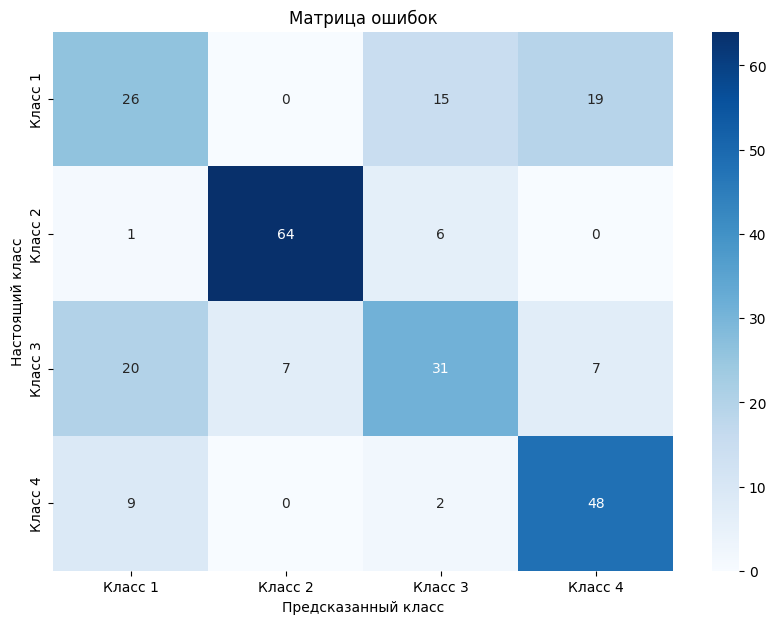

In [498]:
# Матрица ошибок
plot_confusion_matrix(y_test_cls_base, y_pred_base)

**d. Сравнить результаты имплементированных моделей в сравнении с результатами из пункта 2**

Точность и сбалансированная точность получились примерно на 0,4% выше, чем у модели sklearn.

Класс 1 стал на 3 раза реже угадываться правильно, класс 2 - на 1 раз чаще, класс 3 - на 1 раз чаще, класс 4 - на 2 раза чаще.

**e.	Сделать выводы**

Исходя из полученных результатов на данном набое данных, можно сделать вывод, что самостоятельная имплементация KNN классификации работает примерно с той же точностью, что и реализация sklearn.

**f.	Добавить техники из улучшенного бейзлайна (пункт 3с)**

Обучение модели на уже улучшенных данных.

**g.	Обучить модели для выбранного набора данных**

In [499]:
y_pred_optimized = KNN(X_train_cls_scaled_optimized, X_test_cls_scaled_optimized,
             y_train_cls_optimized, y_test_cls_optimized, k=3, p=2, task='classification')

**h.	Оценить качество модели по выбранным метрикам на выбранном наборе данных**

In [500]:
evaluate_classification(y_test_cls_optimized, y_pred_optimized, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
Accuracy = 0.6745098039215687
Balanced accuracy = 0.674423765860741


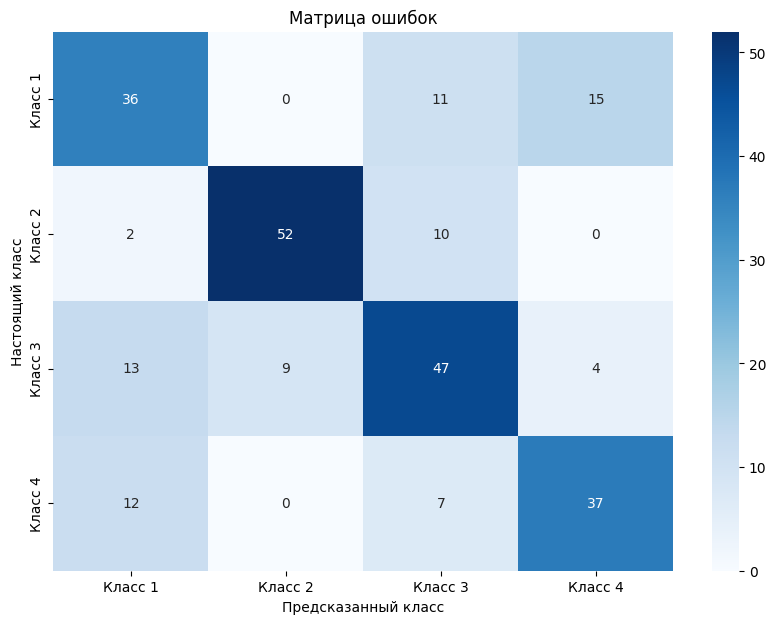

In [501]:
# Матрица ошибок
plot_confusion_matrix(y_test_cls_optimized, y_pred_optimized)

**i.	Сравнить результаты модели в сравнении с результатами из пункта 3**

Точность и сбалансированная точность получились примерно на 0,025 хуже, чем у модели sklearn.

Класс 1 стал на 3 раза реже угадываться правильно, класс 2 - на 1 раз реже, класс 3 - на 2 раза чаще, класс 4 - на 5 раз реже.

**j.	Сделать выводы**

Исходя из полученных результатов на данном набое данных, можно сделать вывод, что самостоятельная имплементация KNN классификации работает примерно с той же точностью, что и реализация sklearn на улучшенном бейзлайне.

#### *Регрессия*

**b. Обучить имплементированную модель для выбранного набора данных**

In [502]:
y_pred_base = KNN(X_train_reg_scaled_base, X_test_reg_scaled_base,
             y_train_reg_base, y_test_reg_base, k=3, p=2, task='regression')

**c. Оценить качество имплементированной модели по выбранным метрикам на выбранном наборе данных**

In [503]:
evaluate_regression(y_test_reg_base, y_pred_base, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
MAE = 0.2176
MAPE = 2.0116%
MSE = 0.0878
RMSE = 0.2963


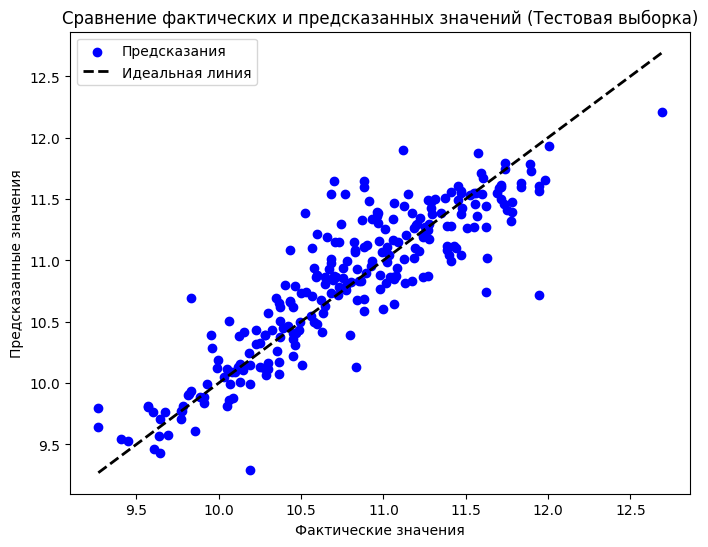

In [504]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_base, y_pred_base)

**d. Сравнить результаты имплементированных моделей в сравнении с результатами из пункта 2**

Исходя из полученных данных, можно сказать, что практически все метрики остались на том же уровне, кучность точек на диаграммах рассеивания не изменилась. Новых выбросов так же нет.

**e.	Сделать выводы**

Исходя из полученных результатов на данном набое данных, можно сделать вывод, что самостоятельная имплементация KNN регрессии работает примерно с той же точностью, что и реализация sklearn.

**f.	Добавить техники из улучшенного бейзлайна (пункт 3с)**

Обучение модели на уже улучшенных данных.

**g.	Обучить модели для выбранного набора данных**

In [505]:
y_pred_optimized = KNN(X_train_reg_scaled_optimized, X_test_reg_scaled_optimized,
             y_train_reg_optimized, y_test_reg_optimized, k=3, p=2, task='regression')

**h.	Оценить качество модели по выбранным метрикам на выбранном наборе данных**

In [506]:
evaluate_regression(y_test_reg_optimized, y_pred_optimized, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
MAE = 0.2146
MAPE = 1.9812%
MSE = 0.0811
RMSE = 0.2847


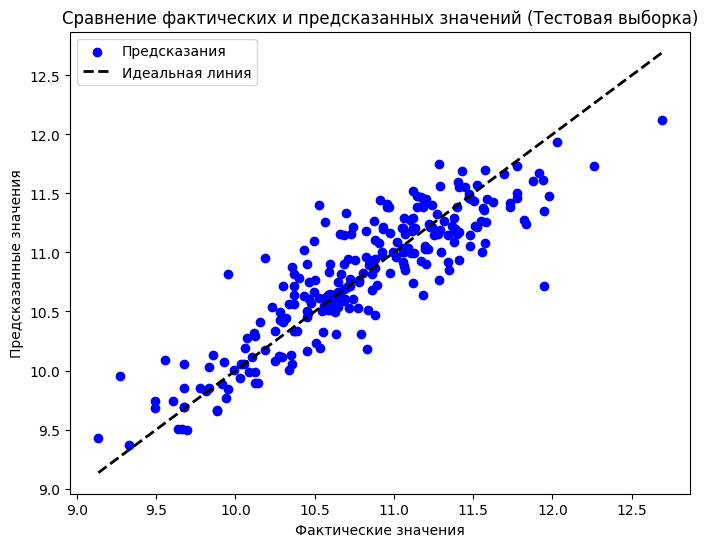

In [507]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_optimized, y_pred_optimized)

**i.	Сравнить результаты модели в сравнении с результатами из пункта 3**

Исходя из полученных данных, можно увидеть следующее:
MAE примерно улучшилась на 0,0017;  MAPE примерно улучшилась на 0.02%; MSE примерно ухудшилась на 0,001; RMSE примерно ухудшилась на 0,0017

Самостоятельная имплементация работает с той же точностью, так как метрики остались примерно на том же уровне. Кучность точек на диаграммах рассеивания стала немного ближе к идеальной линии.

**j.	Сделать выводы**

Исходя из полученных результатов на данном набое данных, можно сделать вывод, что самостоятельная имплементация KNN регрессии работает примерно с той же точностью, что и реализация sklearn на улучшенном бейзлайне.

# **Лабораторная работа 2**

# **Проведение исследований с логистической и линейной регрессией**

## **2. Создание бейзлайна и оценка качества**

In [508]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.multiclass import OneVsRestClassifier

In [509]:
df_base = df.copy()

### Классификация

#### **a. Обучение модели из sklearn для выбранного набора данных**

In [510]:
# Разделение данных для классификации
X_classification_base = df_base.drop(["Price", "Price Class"], axis=1)
y_classification_base = df_base["Price Class"]
X_train_cls_base, X_test_cls_base, y_train_cls_base, y_test_cls_base = train_test_split(
    X_classification_base, y_classification_base, test_size=0.2, random_state=42
)


# scaler = StandardScaler() # Стандартизация данных
scaler = MinMaxScaler() # Нормализация данных
X_train_cls_scaled_base = scaler.fit_transform(X_train_cls_base)
X_test_cls_scaled_base = scaler.transform(X_test_cls_base)
# X_train_cls_scaled_base = X_train_cls_base
# X_test_cls_scaled_base = X_test_cls_base

# Обучение модели классификации
# logreg_classifier = LogisticRegression(max_iter=10000, multi_class='ovr', solver='liblinear')  # Выбор многоклассового подхода (one-vs-rest) # FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead.
logreg_classifier = LogisticRegression(max_iter=10000, solver='liblinear')
ovr_classifier = OneVsRestClassifier(logreg_classifier)
ovr_classifier.fit(X_train_cls_scaled_base, y_train_cls_base)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=10000,
                                                 solver='liblinear'))

#### **b. Оценка качества модели по выбранным метрикам на выбранном наборе данных**

In [511]:
y_test_pred_cls_base = ovr_classifier.predict(X_test_cls_scaled_base)
y_train_pred_cls_base = ovr_classifier.predict(X_train_cls_scaled_base)

# Вывод результатов
evaluate_classification(y_test_cls_base, y_test_pred_cls_base, 'Оценка на валидационной выборке:')

print()

evaluate_classification(y_train_cls_base, y_train_pred_cls_base, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
Accuracy = 0.592156862745098
Balanced accuracy = 0.5877723861640072

Оценка на тренировочной выборке:
Accuracy = 0.6139489194499018
Balanced accuracy = 0.6152054130658648


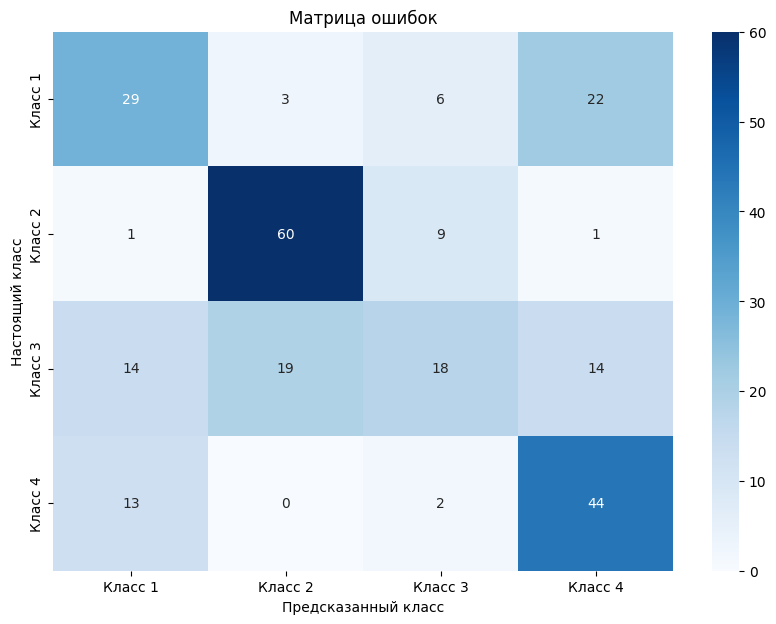

In [512]:
# Создание матрицы ошибок
plot_confusion_matrix(y_test_cls_base, y_test_pred_cls_base)

**Точность модели (Accuracy)** на валидационной выборке составляет 59.22% - достаточно высокая точность при предсказании одного из 4 классов.

In [513]:
# Проверка нулевой оценки точности

null_accuracy_base = (y_test_cls_base.value_counts().max()/y_test_cls_base.value_counts().sum())
print('Null accuracy score: {0:0.4f}'. format(null_accuracy_base))

Null accuracy score: 0.2784


Показатель точности модели составляет 0,5922, а нулевой показатель точности составляет 0,2784. Можно сделать вывод, что модель хорошо справляется с предсказанием меток ценовых классов.

### *Регрессия*

#### **a. Обучение модели из sklearn для выбранного набора данных**

In [516]:
# Разделение данных для регрессии
X_regression_base = df_base.drop(['Price', 'Price Class'], axis=1)
y_regression_base = df_base["Price"]
X_train_reg_base, X_test_reg_base, y_train_reg_base, y_test_reg_base = train_test_split(
    X_regression_base, y_regression_base, test_size=0.2, random_state=42
)

scaler = StandardScaler() # Стандартизация данных
# scaler = MinMaxScaler() # Нормализация данных
X_train_reg_scaled_base = scaler.fit_transform(X_train_reg_base)
X_test_reg_scaled_base = scaler.transform(X_test_reg_base)

# Обучение модели регрессии
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_reg_scaled_base, y_train_reg_base)

LinearRegression()

#### **b. Оценка качества модели по выбранным метрикам на выбранном наборе данных**

In [517]:
y_test_pred_reg_base = linear_regressor.predict(X_test_reg_scaled_base)
y_train_pred_reg_base = linear_regressor.predict(X_train_reg_scaled_base)

# Вывод результатов
evaluate_regression(y_test_reg_base, y_test_pred_reg_base, 'Оценка на валидационной выборке:')

print()

evaluate_regression(y_train_reg_base, y_train_pred_reg_base, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
MAE = 0.2948
MAPE = 2.7515%
MSE = 0.1316
RMSE = 0.3628

Оценка на тренировочной выборке:
MAE = 0.2991
MAPE = 2.7774%
MSE = 0.1401
RMSE = 0.3743


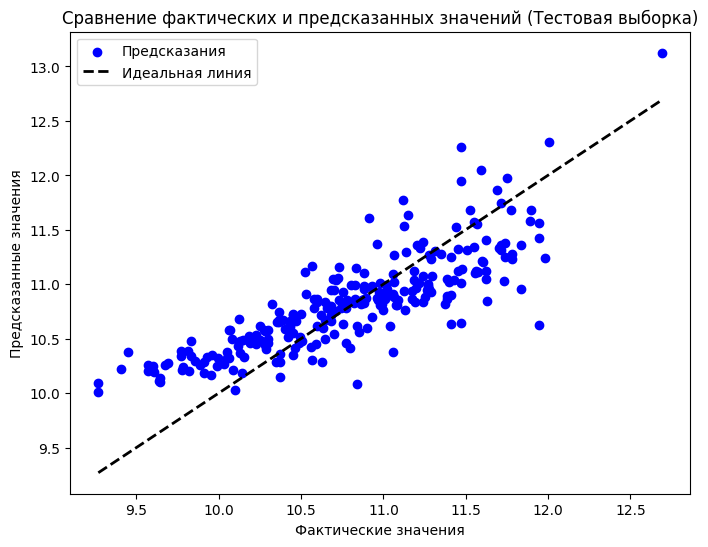

In [518]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_base, y_test_pred_reg_base)

## **3. Улучшение бейзлайна**

**a. b. c. Формирование гипотез и их проверка, а также формирование улучшенного бейзлайна по результатам проверки гипотез (препроцессинг данных, визуализация данных, формирование новых признаков, подбор гиперпараметров на кросс-валидации)**

### *Классификация*

**d. Обучение модели с улучшенным бейзлайном на выбранном наборе данных**

In [520]:
df_optimized = df_temp

# Подготовка данных для классификации
X_classification_optimized = df_optimized.drop(columns=['Price', 'Price Class'], axis=1)
y_classification_optimized = df_optimized['Price Class']

# Разделение на тренировочную и тестовую выборки
X_train_cls_optimized, X_test_cls_optimized, y_train_cls_optimized, y_test_cls_optimized = train_test_split(
    X_classification_optimized, y_classification_optimized, test_size=0.2, random_state=42
)


scaler = StandardScaler() # Стандартизация данных
# scaler = MinMaxScaler() # Нормализация данных
X_train_cls_scaled_optimized  = scaler.fit_transform(X_train_cls_optimized)
X_test_cls_scaled_optimized  = scaler.transform(X_test_cls_optimized)
# X_train_cls_scaled_optimized  = X_train_cls_optimized
# X_test_cls_scaled_optimized  = X_test_cls_optimized

# Обучение модели классификации
logreg_classifier = LogisticRegression(max_iter=10000, solver='liblinear')
ovr_classifier = OneVsRestClassifier(logreg_classifier)
ovr_classifier.fit(X_train_cls_scaled_optimized, y_train_cls_optimized)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=10000,
                                                 solver='liblinear'))

**e.	Оценка качества моделей с улучшенным бейзлайном по выбранным метрикам на выбранных наборах данных**

In [521]:
# Оценка модели классификации
y_pred_train_cls_optimized = ovr_classifier.predict(X_train_cls_scaled_optimized)
y_pred_test_cls_optimized = ovr_classifier.predict(X_test_cls_scaled_optimized)

# Вывод результатов
evaluate_classification(y_test_cls_optimized, y_pred_test_cls_optimized, 'Оценка на валидационной выборке:')

print()

evaluate_classification(y_train_cls_optimized, y_pred_train_cls_optimized, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
Accuracy = 0.5951725882352941
Balanced accuracy = 0.5881050359825769

Оценка на тренировочной выборке:
Accuracy = 0.6450344149459194
Balanced accuracy = 0.6414521457587801


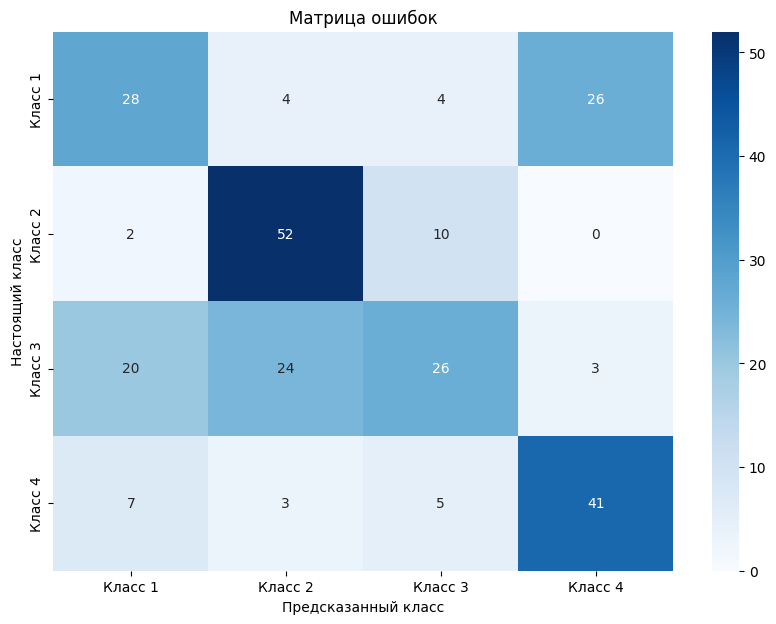

In [522]:
# Матрица ошибок
plot_confusion_matrix(y_test_cls_optimized, y_pred_test_cls_optimized)

**f.	Сравнить результаты моделей с улучшенным бейзлайном в сравнении с результатами из пункта 2**

После улучшения бейзлайна на валидационной выборке модель стала работать примерно на 0,3% точнее, а на тренировочной примерно на 3%

**g.	Сделать выводы**

Скорее всего низкие показатели логистической регрессии обусловлены нелинейностью зависимости между признаками и целевой переменной. Основным улучшением в данной случае является только изменение нормализации на стандартизацию, все остальные факторы не влияют, поскольку линейные модели не учитывают взаимодействие между признаками.

### *Регрессия*

**d. Обучение модели с улучшенным бейзлайном на выбранном наборе данных**

In [523]:
# Разделение данных для регрессии
X_regression_optimized = df_optimized.drop(['Price', 'Price Class'], axis=1)
y_regression_optimized = df_optimized["Price"]
X_train_reg_optimized, X_test_reg_optimized, y_train_reg_optimized, y_test_reg_optimized = train_test_split(
    X_regression_optimized, y_regression_optimized, test_size=0.2, random_state=42
)


scaler = StandardScaler() # Стандартизация
# scaler = MinMaxScaler() # Нормализация данных
X_train_reg_scaled_optimized = scaler.fit_transform(X_train_reg_optimized)
X_test_reg_scaled_optimized = scaler.transform(X_test_reg_optimized)

# Обучение модели регрессии
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_reg_scaled_optimized, y_train_reg_optimized)

LinearRegression()

**e.	Оценка качества моделей с улучшенным бейзлайном по выбранным метрикам на выбранных наборах данных**

In [524]:
y_test_pred_reg_optimized = linear_regressor.predict(X_test_reg_scaled_optimized)
y_train_pred_reg_optimized = linear_regressor.predict(X_train_reg_scaled_optimized)

# Вывод результатов
evaluate_regression(y_test_reg_optimized, y_test_pred_reg_optimized, 'Оценка на валидационной выборке:')

print()

evaluate_regression(y_train_reg_optimized, y_train_pred_reg_optimized, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
MAE = 0.2912
MAPE = 2.6234%
MSE = 0.1279
RMSE = 0.3576

Оценка на тренировочной выборке:
MAE = 0.2935
MAPE = 2.6705%
MSE = 0.1301
RMSE = 0.3607


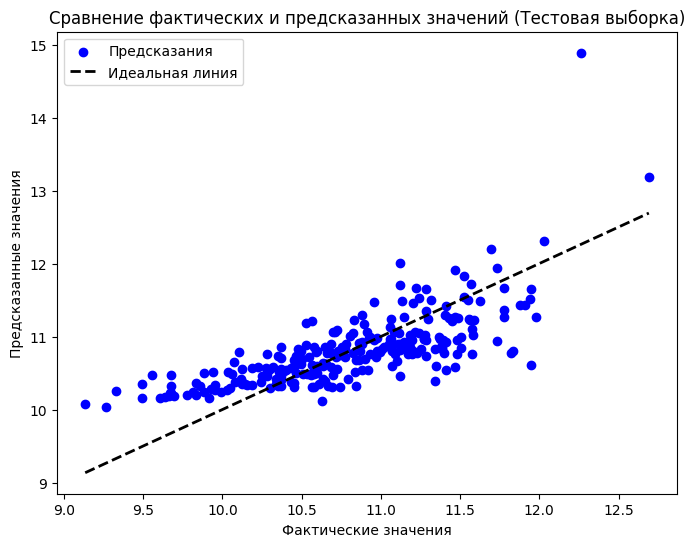

In [525]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_optimized, y_test_pred_reg_optimized)


**f.	Сравнить результаты моделей с улучшенным бейзлайном в сравнении с результатами из пункта 2**

На улучшенном бейзлайне модель показала следующие улучшения:

MAE уменьшилась с 0.2948 до 0.2912, что говорит о том, что в среднем ошибки предсказания стали меньше.

MAPE снизилась с 2.75% до 2.62%, что говорит о том, что модель стала предсказывать значения с меньшей относительной ошибкой.

MSE уменьшилась с 0.1316 до 0.1279, что подтверждает уменьшение величины ошибок, особенно крупных.

RMSE снизился с 0.3628 до 0.3576, что также подтверждает снижение ошибок, особенно в больших значениях.

Подводя итоги, можно сказать, что модель на улучшенном бейзлайне показала увеличение точности предсказаний во всех метриках и графики рассеиваний указывают на то, что множество точек стало более кучно располагаться около идеальной линии.

**g.	Сделать выводы**

Скорее всего низкие показатели логистической регрессии обусловлены нелинейностью зависимости между признаками и целевой переменной. Основным улучшением в данной случае является только изменение нормализации на стандартизацию, все остальные факторы не влияют, поскольку линейные модели не учитывают взаимодействие между признаками.

## **4.	Имплементация алгоритма машинного обучения**

**a. Самостоятельно имплементировать алгоритмы машинного обучения (для классификации и регрессии)**

In [526]:
import numpy as np

# Функция для обучения и предсказания (классификация или регрессия)
def custom_regression(X_train, y_train, X_test, task='classification', learning_rate=0.01, n_iterations=1000, tolerance=1e-6):
    if task == 'classification':
        # Логистическая регрессия для многоклассовой классификации (One-vs-Rest)
        return logistic_regression_multiclass(X_train, y_train, X_test, learning_rate, n_iterations, tolerance)
    elif task == 'regression':
        # Линейная регрессия
        return linear_regression(X_train, y_train, X_test, learning_rate, n_iterations, tolerance)
    else:
        raise ValueError("Task must be 'classification' or 'regression'")

# Многоклассовая логистическая регрессия (One-vs-Rest)
def logistic_regression_multiclass(X_train, y_train, X_test, learning_rate=0.01, n_iterations=1000, tolerance=1e-6):
    n_samples, n_features = X_train.shape
    n_classes = len(np.unique(y_train))

    # Преобразование метки классов в числовые значения
    class_map = {label: idx for idx, label in enumerate(np.unique(y_train))}
    y_train_num = np.array([class_map[label] for label in y_train])

    # Инициализация весов для каждого класса
    weights = np.zeros((n_features, n_classes))
    bias = np.zeros(n_classes)

    # Градиентный спуск для каждого класса (One-vs-Rest)
    for _ in range(n_iterations):
        # Линейная комбинация признаков
        model = np.dot(X_train, weights) + bias
        predictions = softmax(model)

        # Градиенты для каждого класса
        dw = (1 / n_samples) * np.dot(X_train.T, (predictions - one_hot_encode(y_train_num, n_classes)))
        db = (1 / n_samples) * np.sum(predictions - one_hot_encode(y_train_num, n_classes), axis=0)

        # Обновление параметров
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Проверка на сходимость
        if np.linalg.norm(dw) < tolerance and np.max(np.abs(db)) < tolerance:
            break

    # Предсказания для теста
    model_test = np.dot(X_test, weights) + bias
    y_pred_prob = softmax(model_test)
    y_pred_classes = np.argmax(y_pred_prob, axis=1)

    # Преобразование обратно в исходные метки классов
    reverse_class_map = {v: k for k, v in class_map.items()}
    y_pred_labels = [reverse_class_map[label] for label in y_pred_classes]

    return np.array(y_pred_labels)

# Функция softmax для многоклассовой классификации
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Для стабильности чисел
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Функция для one-hot кодирования меток классов
def one_hot_encode(y, n_classes):
    return np.eye(n_classes)[y]

# Линейная регрессия
def linear_regression(X_train, y_train, X_test, learning_rate=0.01, n_iterations=1000, tolerance=1e-6):
    n_samples, n_features = X_train.shape
    weights = np.zeros(n_features)
    bias = 0

    # Градиентный спуск
    for _ in range(n_iterations):
        model = np.dot(X_train, weights) + bias
        predictions = model

        # Градиенты
        dw = (2 / n_samples) * np.dot(X_train.T, (predictions - y_train))
        db = (2 / n_samples) * np.sum(predictions - y_train)

        # Обновление параметров
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Проверка на сходимость
        if np.linalg.norm(dw) < tolerance and np.abs(db) < tolerance:
            break

    # Предсказания для теста
    model_test = np.dot(X_test, weights) + bias
    return model_test


#### *Классификация*

**b. Обучить имплементированную модель для выбранного набора данных**

In [527]:
y_pred_base = custom_regression(X_train_cls_scaled_base, y_train_cls_base, X_test_cls_scaled_base, task='classification', learning_rate=0.15, n_iterations=10000)

**c. Оценить качество имплементированной модели по выбранным метрикам на выбранном наборе данных**

In [528]:
evaluate_classification(y_test_cls_base, y_pred_base, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
Accuracy = 0.5875190196078431
Balanced accuracy = 0.5837149719595278


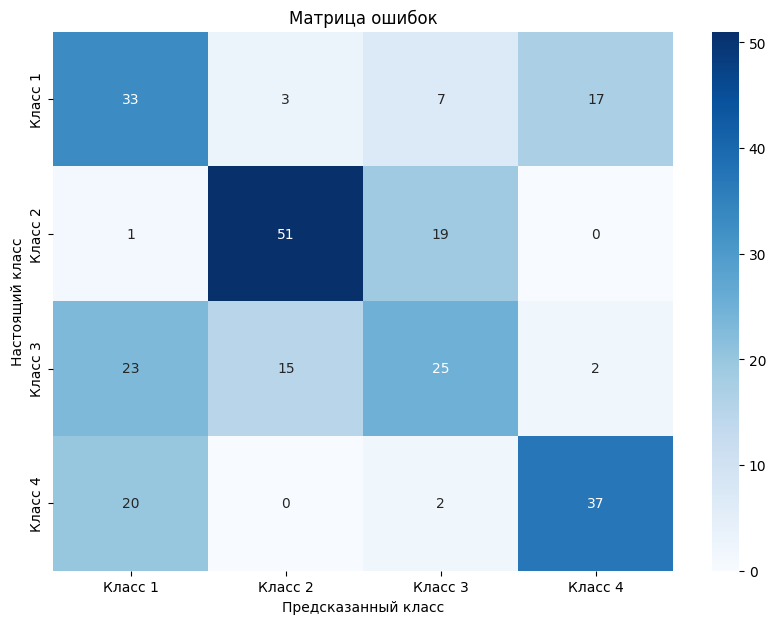

In [529]:
# Создание матрицы ошибок
plot_confusion_matrix(y_test_cls_base, y_pred_base)

**d. Сравнить результаты имплементированных моделей в сравнении с результатами из пункта 2**

Точность и сбалансированная точность получились примерно на 0,005 хуже, чем у модели sklearn.

Суммарно классы показали на 5 раз хуже угадываемость классов.

**e.	Сделать выводы**

Исходя из полученных результатов на данном набое данных, можно сделать вывод, что самостоятельная имплементация логистической регрессии работает примерно с той же точностью, что и реализация sklearn.

**f.	Добавить техники из улучшенного бейзлайна (пункт 3с)**

Обучение модели на уже улучшенных данных.

**g.	Обучить модели для выбранного набора данных**

In [530]:
y_pred_optimized = custom_regression(X_train_cls_scaled_optimized, y_train_cls_optimized, X_test_cls_scaled_optimized, task='classification', learning_rate=0.01, n_iterations=10000)

**h.	Оценить качество модели по выбранным метрикам на выбранном наборе данных**

In [531]:
evaluate_classification(y_test_cls_optimized, y_pred_optimized, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
Accuracy = 0.6039215686274509
Balanced accuracy = 0.6126494835395493


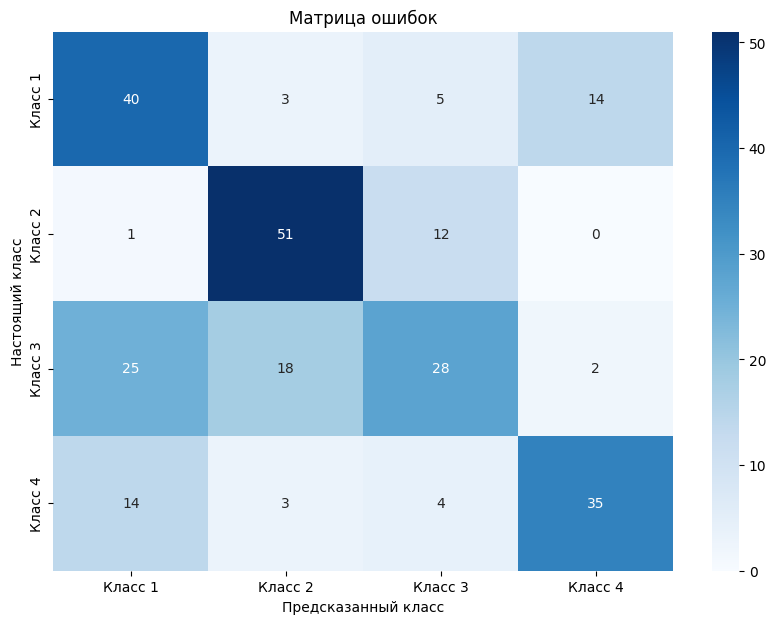

In [532]:
# Создание матрицы ошибок
plot_confusion_matrix(y_test_cls_optimized, y_pred_optimized)

**i.	Сравнить результаты модели в сравнении с результатами из пункта 3**

Точность и сбалансированная точность получились примерно на 0,8% лучше, чем у модели sklearn.

Класс 1 стал на 12 раз чаще угадываться правильно, класс 2 - на 1 раз реже, класс 3 - на 2 раза чаще, класс 4 - на 6 раз реже.

**j.	Сделать выводы**

Исходя из полученных результатов на данном набое данных, можно сделать вывод, что самостоятельная имплементация логистической регрессии работает примерно с той же точностью, что и реализация sklearn на улучшенном бейзлайне.

#### *Регрессия*

**b. Обучить имплементированную модель для выбранного набора данных**

In [533]:
y_pred_base = custom_regression(X_train_reg_scaled_base, y_train_reg_base, X_test_reg_scaled_base, task='regression', learning_rate=0.01, n_iterations=1000)

**c. Оценить качество имплементированной модели по выбранным метрикам на выбранном наборе данных**

In [534]:
evaluate_regression(y_test_reg_base, y_pred_base, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
MAE = 0.2948
MAPE = 2.7516%
MSE = 0.1316
RMSE = 0.3628


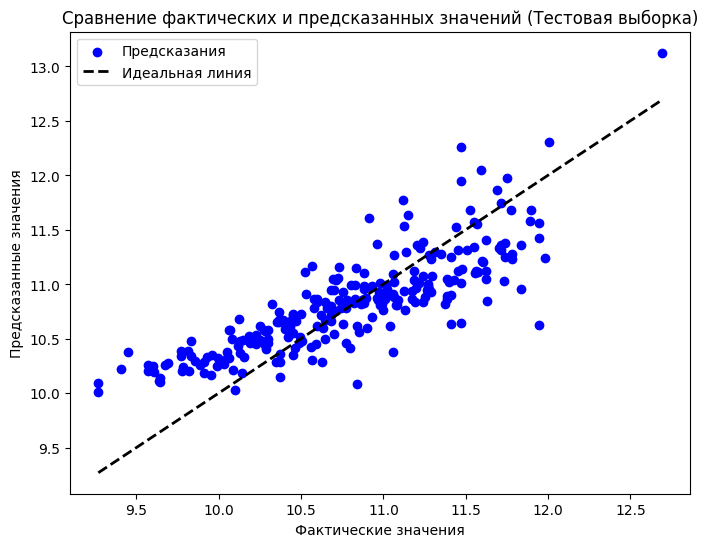

In [535]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_base, y_pred_base)

**d. Сравнить результаты имплементированных моделей в сравнении с результатами из пункта 2**

Исходя из полученных данных, можно сказать, что все метрики остались на том же уровне, кучность точек на диаграммах рассеивания не изменилась.

**e.	Сделать выводы**

Исходя из полученных результатов на данном набое данных, можно сделать вывод, что самостоятельная имплементация линейной регрессии работает примерно с той же точностью, что и реализация sklearn.

**f.	Добавить техники из улучшенного бейзлайна (пункт 3с)**

Обучение модели на уже улучшенных данных.

**g.	Обучить модели для выбранного набора данных**

In [536]:
y_pred_optimized = custom_regression(X_train_reg_scaled_optimized, y_train_reg_optimized, X_test_reg_scaled_optimized, task='regression', learning_rate=0.01, n_iterations=1000)

**h.	Оценить качество модели по выбранным метрикам на выбранном наборе данных**

In [537]:
evaluate_regression(y_test_reg_optimized, y_pred_optimized, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
MAE = 0.2989
MAPE = 2.7966%
MSE = 0.1548
RMSE = 0.3934


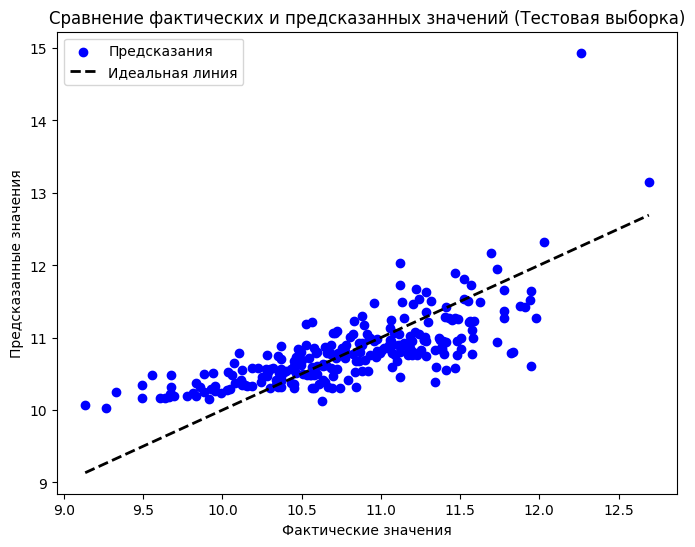

In [538]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_optimized, y_pred_optimized)

**i.	Сравнить результаты модели в сравнении с результатами из пункта 3**

Исходя из полученных данных видно следующее:

MAE с 0.2912 до 0.2989; MAPE изменилась с 2.6234% до 2.7966%; MSE изменилась с 0.1279 до 0.1548; RMSE изменилась с 0.3576 до 0.3934.

Можно сказать, что практически все метрики остались на том же уровне, кучность точек на диаграммах рассеивания практически не изменилась.

**j.	Сделать выводы**

Исходя из полученных результатов на данном набое данных, можно сделать вывод, что самостоятельная имплементация линейной регрессии работает примерно с той же точностью, что и реализация sklearn на улучшенном бейзлайне.

# **Лабораторная работа 3**

# **Проведение исследований с решающим деревом**

## **2. Создание бейзлайна и оценка качества**

In [539]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [540]:
df_base = df.copy()

### Классификация

#### **a. Обучение модели из sklearn для выбранного набора данных**

In [541]:
# Разделение данных для классификации
X_classification_base = df_base.drop(["Price", "Price Class"], axis=1)
y_classification_base = df_base["Price Class"]
X_train_cls_base, X_test_cls_base, y_train_cls_base, y_test_cls_base = train_test_split(
    X_classification_base, y_classification_base, test_size=0.2, random_state=42
)


scaler = StandardScaler() # Стандартизация данных
# scaler = MinMaxScaler() # Нормализация данных
X_train_cls_scaled_base = scaler.fit_transform(X_train_cls_base)
X_test_cls_scaled_base = scaler.transform(X_test_cls_base)

# Обучение модели классификации
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_cls_scaled_base, y_train_cls_base)

DecisionTreeClassifier(random_state=42)

#### **b. Оценка качества модели по выбранным метрикам на выбранном наборе данных**

In [542]:
y_test_pred_cls_base = dt_classifier.predict(X_test_cls_scaled_base)
y_train_pred_cls_base = dt_classifier.predict(X_train_cls_scaled_base)

# Вывод результатов
evaluate_classification(y_test_cls_base, y_test_pred_cls_base, 'Оценка на валидационной выборке:')

print()

evaluate_classification(y_train_cls_base, y_train_pred_cls_base, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
Accuracy = 0.6588235294117647
Balanced accuracy = 0.6520922470940375

Оценка на тренировочной выборке:
Accuracy = 0.9793713163064833
Balanced accuracy = 0.9794985655862785


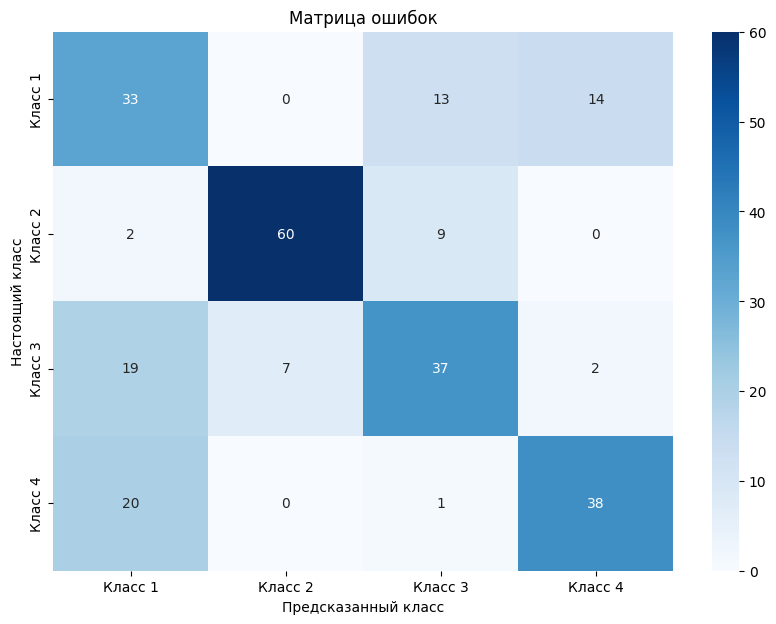

In [543]:
# Создание матрицы ошибок
plot_confusion_matrix(y_test_cls_base, y_test_pred_cls_base)

**Точность модели (Accuracy)** на валидационной выборке составляет 65.88% - достаточно высокая точность при предсказании одного из 4 классов.

In [544]:
# Проверка нулевой оценки точности

null_accuracy_base = (y_test_cls_base.value_counts().max()/y_test_cls_base.value_counts().sum())
print('Null accuracy score: {0:0.4f}'. format(null_accuracy_base))

Null accuracy score: 0.2784


Показатель точности модели составляет 0,6588, а нулевой показатель точности составляет 0,2784. Можно сделать вывод, что модель решающего дерева хорошо справляется с предсказанием меток ценовых классов.

### *Регрессия*

#### **a. Обучение модели из sklearn для выбранного набора данных**

In [546]:
# Разделение данных для регрессии
X_regression_base = df_base.drop(['Price', 'Price Class'], axis=1)
y_regression_base = df_base["Price"]
X_train_reg_base, X_test_reg_base, y_train_reg_base, y_test_reg_base = train_test_split(
    X_regression_base, y_regression_base, test_size=0.2, random_state=42
)

scaler = StandardScaler() # Стандартизация данных
# scaler = MinMaxScaler() # Нормализация данных
X_train_reg_scaled_base = scaler.fit_transform(X_train_reg_base)
X_test_reg_scaled_base = scaler.transform(X_test_reg_base)

# Обучение модели регрессии
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor .fit(X_train_reg_scaled_base, y_train_reg_base)

DecisionTreeRegressor(random_state=42)

#### **b. Оценка качества модели по выбранным метрикам на выбранном наборе данных**

In [547]:
y_test_pred_reg_base = dt_regressor.predict(X_test_reg_scaled_base)
y_train_pred_reg_base = dt_regressor.predict(X_train_reg_scaled_base)

# Вывод результатов
evaluate_regression(y_test_reg_base, y_test_pred_reg_base, 'Оценка на валидационной выборке:')

print()

evaluate_regression(y_train_reg_base, y_train_pred_reg_base, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
MAE = 0.1985
MAPE = 1.8429%
MSE = 0.0757
RMSE = 0.2751

Оценка на тренировочной выборке:
MAE = 0.0125
MAPE = 0.1152%
MSE = 0.0017
RMSE = 0.0412


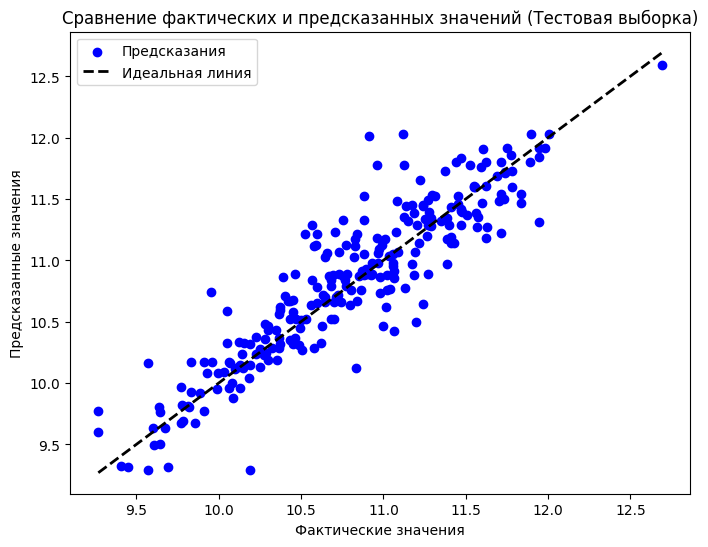

In [548]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_base, y_test_pred_reg_base)

MAPE (1.8429%) на валидационной выборке и MAE (0.1985) достаточно низкие, что говорит о том, что модель может быть использована для решения задач с определённой погрешностью.

## **3. Улучшение бейзлайна**

**a. b. c. Формирование гипотез и их проверка, а также формирование улучшенного бейзлайна по результатам проверки гипотез (препроцессинг данных, визуализация данных, формирование новых признаков, подбор гиперпараметров на кросс-валидации)**

### *Классификация*

**d. Обучение модели с улучшенным бейзлайном на выбранном наборе данных**

In [551]:
df_optimized = df_temp

# Подготовка данных для классификации
X_classification_optimized = df_optimized.drop(columns=['Price', 'Price Class'], axis=1)
y_classification_optimized = df_optimized['Price Class']

# Разделение на тренировочную и тестовую выборки
X_train_cls_optimized, X_test_cls_optimized, y_train_cls_optimized, y_test_cls_optimized = train_test_split(
    X_classification_optimized, y_classification_optimized, test_size=0.2, random_state=42
)


scaler = StandardScaler() # Стандартизация данных
# scaler = MinMaxScaler() # Нормализация данных
X_train_cls_scaled_optimized  = scaler.fit_transform(X_train_cls_optimized)
X_test_cls_scaled_optimized  = scaler.transform(X_test_cls_optimized)

# Обучение модели классификации
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_cls_scaled_optimized, y_train_cls_optimized)

DecisionTreeClassifier(random_state=42)

**e.	Оценка качества моделей с улучшенным бейзлайном по выбранным метрикам на выбранных наборах данных**

In [552]:
# Оценка модели классификации
y_pred_train_cls_optimized = dt_classifier.predict(X_train_cls_scaled_optimized)
y_pred_test_cls_optimized = dt_classifier.predict(X_test_cls_scaled_optimized)

# Вывод результатов
evaluate_classification(y_test_cls_optimized, y_pred_test_cls_optimized, 'Оценка на валидационной выборке:')

print()

evaluate_classification(y_train_cls_optimized, y_pred_train_cls_optimized, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
Accuracy = 0.6600912549019608
Balanced accuracy = 0.6558109730288491

Оценка на тренировочной выборке:
Accuracy = 0.9105211406096362
Balanced accuracy = 0.9095134044646735


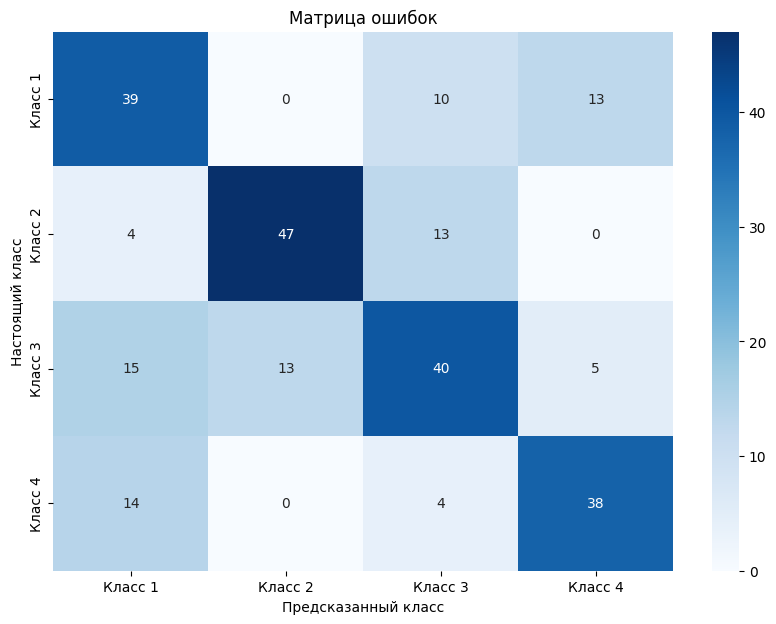

In [553]:
# Матрица ошибок
plot_confusion_matrix(y_test_cls_optimized, y_pred_test_cls_optimized)

**f.	Сравнить результаты моделей с улучшенным бейзлайном в сравнении с результатами из пункта 2**

После улучшения бейзлайна на валидационной выборке модель стала работать примерно на 1% точнее, а на тренировочной примерно на 6% хуже, что говорит об уменьшении переобучения модели.

**g.	Сделать выводы**

Из проделанных действий и полученных результатов можно сделать вывод, что дублирующие данные, а также данные с низкой корреляцией относительно целевых столбцов и применение labelEncoder к столбцу HDD - всё это мешало модели и понижало точность, а все исправления в совокупности помогли дереву решений обучиться правильнее и с большей точностью предсказывать ценовой класс ноутбука.

### *Регрессия*

**d. Обучение модели с улучшенным бейзлайном на выбранном наборе данных**

In [554]:
# Разделение данных для регрессии
X_regression_optimized = df_optimized.drop(['Price', 'Price Class'], axis=1)
y_regression_optimized = df_optimized["Price"]
X_train_reg_optimized, X_test_reg_optimized, y_train_reg_optimized, y_test_reg_optimized = train_test_split(
    X_regression_optimized, y_regression_optimized, test_size=0.2, random_state=42
)


scaler = StandardScaler() # Стандартизация
# scaler = MinMaxScaler() # Нормализация данных
X_train_reg_scaled_optimized = scaler.fit_transform(X_train_reg_optimized)
X_test_reg_scaled_optimized = scaler.transform(X_test_reg_optimized)

# Обучение модели регрессии
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train_reg_scaled_optimized, y_train_reg_optimized)

DecisionTreeRegressor(random_state=42)

**e.	Оценка качества моделей с улучшенным бейзлайном по выбранным метрикам на выбранных наборах данных**

In [555]:
y_test_pred_reg_optimized = dt_regressor.predict(X_test_reg_scaled_optimized)
y_train_pred_reg_optimized = dt_regressor.predict(X_train_reg_scaled_optimized)

# Вывод результатов
evaluate_regression(y_test_reg_optimized, y_test_pred_reg_optimized, 'Оценка на валидационной выборке:')

print()

evaluate_regression(y_train_reg_optimized, y_train_pred_reg_optimized, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
MAE = 0.1867
MAPE = 1.7812%
MSE = 0.0711
RMSE = 0.2666

Оценка на тренировочной выборке:
MAE = 0.0101
MAPE = 0.1032%
MSE = 0.0012
RMSE = 0.0346


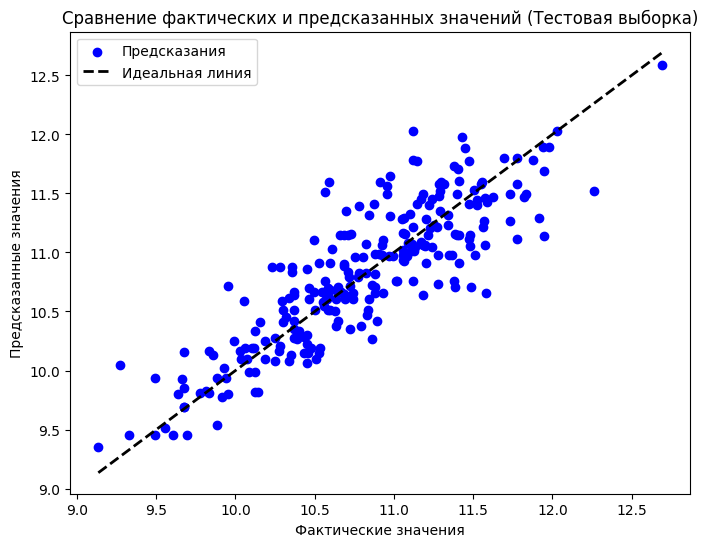

In [556]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_optimized, y_test_pred_reg_optimized)


**f.	Сравнить результаты моделей с улучшенным бейзлайном в сравнении с результатами из пункта 2**

На улучшенном бейзлайне модель показала следующие улучшения:

MAE уменьшилась с 0.1985 до 0.1867, что говорит о том, что в среднем ошибки предсказания стали меньше.

MAPE снизилась с 1.8429% до 1.7812%, что говорит о том, что модель стала предсказывать значения с меньшей относительной ошибкой.

MSE уменьшилась с 0.0757 до 0.0711, что подтверждает уменьшение величины ошибок, особенно крупных.

RMSE снизился с 0.2751 до 0.2666, что также подтверждает снижение ошибок, особенно в больших значениях.

Подводя итоги, можно сказать, что модель на улучшенном бейзлайне показала увеличение точности предсказаний во всех метриках и графики рассеиваний указывают на то что стало меньше выбросов и само множество точек стало более кучно располагаться около идеальной линии.

**g.	Сделать выводы**

Из проделанных действий и полученных результатов можно сделать вывод, что дублирующие данные, а также данные с низкой корреляцией относительно целевых столбцов и применение labelEncoder к столбцу HDD - всё это мешало модели и понижало точность, а все исправления в совокупности помогли решающему дереву обучиться правильнее и с большей точностью предсказывать ценовой класс ноутбука.

## **4.	Имплементация алгоритма машинного обучения**

**a. Самостоятельно имплементировать алгоритмы машинного обучения (для классификации и регрессии)**

In [557]:
import numpy as np
from collections import Counter

# Функция для вычисления энтропии (для классификации)
def entropy(y):
    class_counts = Counter(y)
    probabilities = np.array(list(class_counts.values())) / len(y)
    return -np.sum(probabilities * np.log2(probabilities))

# Функция для вычисления индекса Джини (для классификации)
def gini_impurity(y):
    class_counts = Counter(y)
    probabilities = np.array(list(class_counts.values())) / len(y)
    return 1 - np.sum(probabilities ** 2)

# Функция для вычисления MSE (для регрессии)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Функция для поиска наилучшего разбиения
def best_split(X, y, criterion='gini'):
    best_impurity = float('inf')
    best_split_info = None
    n_samples, n_features = X.shape

    for feature_idx in range(n_features):
        possible_splits = np.unique(X[:, feature_idx])

        for threshold in possible_splits:
            left_mask = X[:, feature_idx] <= threshold
            right_mask = ~left_mask
            y_left, y_right = y[left_mask], y[right_mask]

            # Пропуск разбиения, если хотя бы одна из частей пуста
            if len(y_left) == 0 or len(y_right) == 0:
                continue

            if criterion == 'gini':
                impurity = gini_impurity(y_left) * len(y_left) / n_samples + gini_impurity(y_right) * len(y_right) / n_samples
            elif criterion == 'entropy':
                impurity = entropy(y_left) * len(y_left) / n_samples + entropy(y_right) * len(y_right) / n_samples
            elif criterion == 'mse':  # Для задачи регрессии
                left_pred = np.mean(y_left)
                right_pred = np.mean(y_right)
                impurity = (np.mean((y_left - left_pred) ** 2) * len(y_left) + np.mean((y_right - right_pred) ** 2) * len(y_right)) / n_samples
            else:
                raise ValueError("Criterion must be 'gini', 'entropy' or 'mse'")

            if impurity < best_impurity:
                best_impurity = impurity
                best_split_info = (feature_idx, threshold)

    return best_split_info

# Рекурсивная функция для построения дерева
def build_tree(X, y, task='classification', max_depth=None, min_samples_split=2, depth=0, criterion='gini'):
    n_samples, n_features = X.shape
    unique_classes = np.unique(y)

    if len(unique_classes) == 1 or (max_depth and depth == max_depth) or n_samples < min_samples_split:
        if task == 'classification':
            return Counter(y).most_common(1)[0][0]  # Наиболее частый класс
        elif task == 'regression':
            return np.mean(y)  # Среднее значение для регрессии

    # Лучшее разбиение
    best_split_info = best_split(X, y, criterion)
    if not best_split_info:
        return np.mean(y) if task == 'regression' else Counter(y).most_common(1)[0][0]  # Если не удалось найти разбиение

    feature_idx, threshold = best_split_info
    left_mask = X[:, feature_idx] <= threshold
    right_mask = ~left_mask
    X_left, y_left = X[left_mask], y[left_mask]
    X_right, y_right = X[right_mask], y[right_mask]

    # Рекурсивное построение дерева
    left_node = build_tree(X_left, y_left, task, max_depth, min_samples_split, depth+1, criterion)
    right_node = build_tree(X_right, y_right, task, max_depth, min_samples_split, depth+1, criterion)

    return (feature_idx, threshold, left_node, right_node)

# Функция для предсказания с использованием дерева
def predict_tree(tree, X):
    if isinstance(tree, tuple):
        feature_idx, threshold, left_node, right_node = tree
        if X[feature_idx] <= threshold:
            return predict_tree(left_node, X)
        else:
            return predict_tree(right_node, X)
    else:
        return tree  # Предсказание (класс или значение)

# Функция для обучения и предсказания с деревом решений
def decision_tree(X_train, y_train, X_test, task='classification', max_depth=None, min_samples_split=2, criterion='gini'):
    tree = build_tree(X_train, y_train, task, max_depth, min_samples_split, criterion=criterion)
    y_pred = np.array([predict_tree(tree, x) for x in X_test])
    return y_pred

#### *Классификация*

**b. Обучить имплементированную модель для выбранного набора данных**

In [558]:
y_pred_base = decision_tree(X_train_cls_scaled_base, y_train_cls_base, X_test_cls_scaled_base, task='classification', criterion='gini')

**c. Оценить качество имплементированной модели по выбранным метрикам на выбранном наборе данных**

In [559]:
evaluate_classification(y_test_cls_base, y_pred_base, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
Accuracy = 0.6588235294117647
Balanced accuracy = 0.6518423557424513


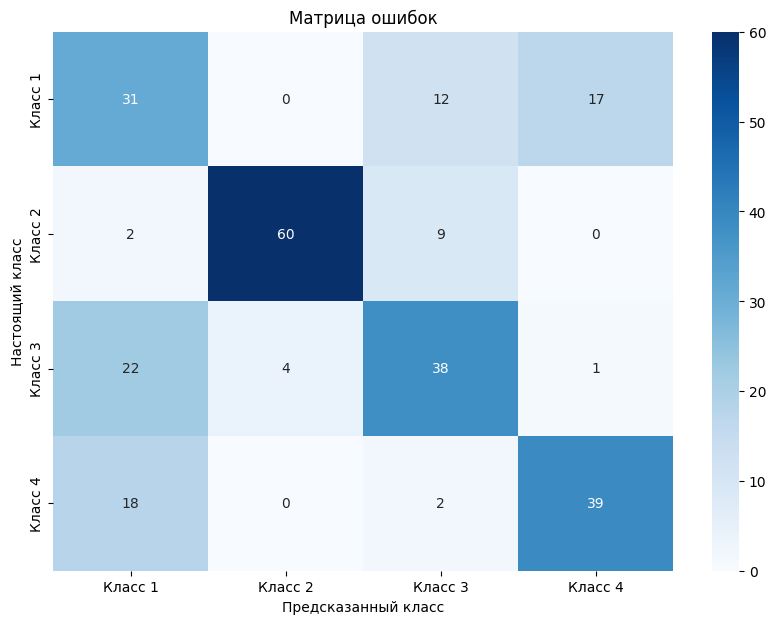

In [560]:
# Матрица ошибок
plot_confusion_matrix(y_test_cls_base, y_pred_base)

**d. Сравнить результаты имплементированных моделей в сравнении с результатами из пункта 2**

Точность и сбалансированная точность получились практически идентичными с моделью sklearn.

Класс 1 стал на 2 раза реже угадываться правильно, класс 2 - не изменился, класс 3 - на 1 раз чаще, класс 4 - на 1 раз чаще.

**e.	Сделать выводы**

Исходя из полученных результатов на данном набое данных, можно сделать вывод, что самостоятельная имплементация классификации с использованием решающего дерева работает примерно с той же точностью, что и реализация sklearn.

**f.	Добавить техники из улучшенного бейзлайна (пункт 3с)**

Обучение модели на уже улучшенных данных.

**g.	Обучить модели для выбранного набора данных**

In [561]:
y_pred_optimized = decision_tree(X_train_cls_scaled_optimized, y_train_cls_optimized, X_test_cls_scaled_optimized, task='classification', criterion='gini')

**h.	Оценить качество модели по выбранным метрикам на выбранном наборе данных**

In [562]:
evaluate_classification(y_test_cls_optimized, y_pred_optimized, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
Accuracy = 0.6589455490196078
Balanced accuracy = 0.6540985706552616


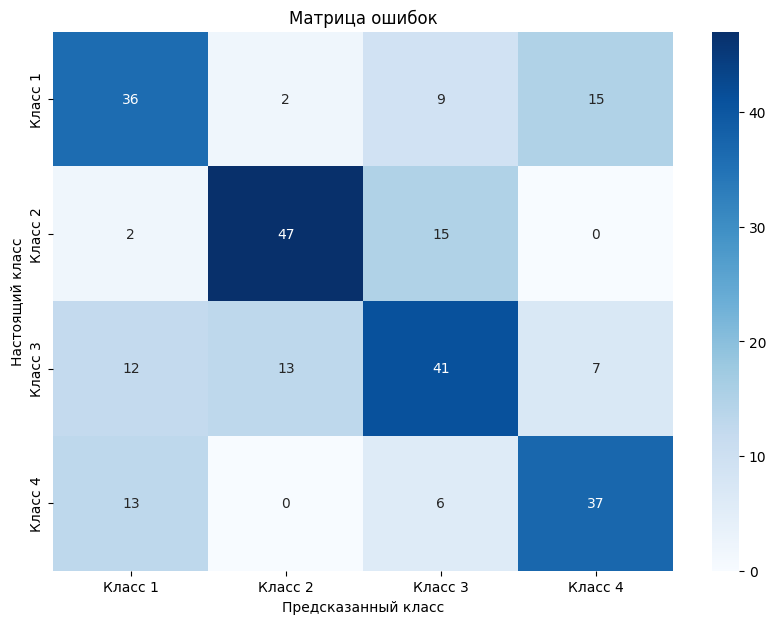

In [563]:
# Матрица ошибок
plot_confusion_matrix(y_test_cls_optimized, y_pred_optimized)

**i.	Сравнить результаты модели в сравнении с результатами из пункта 3**

Точность и сбалансированная точность получились примерно на 0,0011 хуже, чем у модели sklearn.

Класс 1 стал на 3 раза реже угадываться правильно, класс 2 - не изменился, класс 3 - на 1 раз чаще, класс 4 - на 1 раз реже.

**j.	Сделать выводы**

Исходя из полученных результатов на данном набое данных, можно сделать вывод, что самостоятельная имплементация классификации с использованием решающего дерева работает примерно с той же точностью, что и реализация sklearn на улучшенном бейзлайне.

#### *Регрессия*

**b. Обучить имплементированную модель для выбранного набора данных**

In [564]:
y_pred_base = decision_tree(X_train_reg_scaled_base, y_train_reg_base, X_test_reg_scaled_base, task='regression', criterion='mse')

**c. Оценить качество имплементированной модели по выбранным метрикам на выбранном наборе данных**

In [565]:
evaluate_regression(y_test_reg_base, y_pred_base, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
MAE = 0.2061
MAPE = 1.9056%
MSE = 0.0782
RMSE = 0.2797


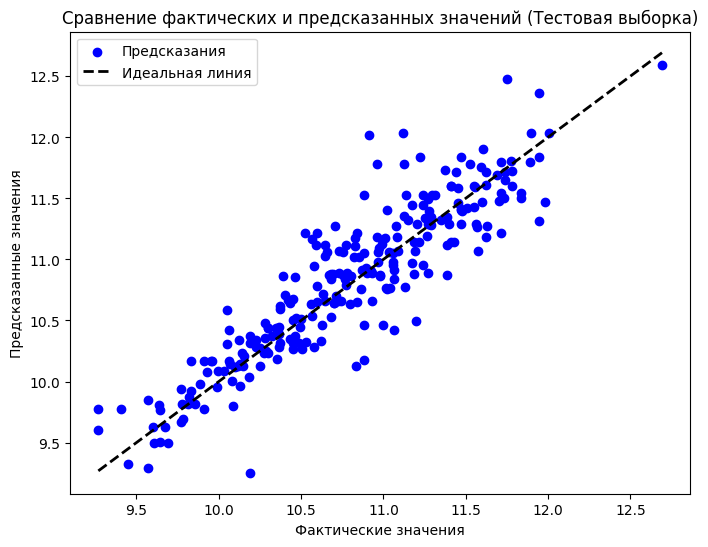

In [566]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_base, y_pred_base)

**d. Сравнить результаты имплементированных моделей в сравнении с результатами из пункта 2**

Исходя из полученных данных видно следующее:

MAE с 0.1985 до 0.2061; MAPE изменилась с 1.8429% до 1.9056%; MSE изменилась с 0.0757 до 0.0782; RMSE изменилась с 0.2751 до 0.2797.

Можно сказать, что все метрики немного ухудшились, однако кучность точек на диаграммах рассеивания практически не изменилась.

**e.	Сделать выводы**

Исходя из полученных результатов на данном набое данных, можно сделать вывод, что самостоятельная имплементация регрессии с использованием решающего дерева работает примерно с той же точностью, что и реализация sklearn.

**f.	Добавить техники из улучшенного бейзлайна (пункт 3с)**

Обучение модели на уже улучшенных данных.

**g.	Обучить модели для выбранного набора данных**

In [567]:
y_pred_optimized = decision_tree(X_train_reg_scaled_optimized, y_train_reg_optimized, X_test_reg_scaled_optimized, task='regression', criterion='mse')

**h.	Оценить качество модели по выбранным метрикам на выбранном наборе данных**

In [568]:
evaluate_regression(y_test_reg_optimized, y_pred_optimized, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
MAE = 0.1805
MAPE = 1.7264%
MSE = 0.0679
RMSE = 0.2606


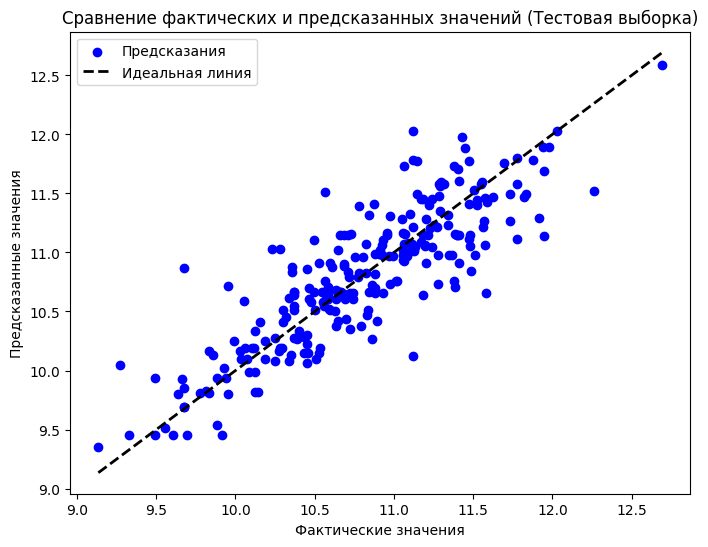

In [569]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_optimized, y_pred_optimized)

**i.	Сравнить результаты модели в сравнении с результатами из пункта 3**

Исходя из полученных данных видно следующее:

MAE с 0.1867 до 0.1805; MAPE изменилась с 1.7812% до 1.7264%; MSE изменилась с 0.0711 до 0.0679; RMSE изменилась с 0.2666 до 0.2604.

Можно сказать, что все метрики немного улучшились, кучность точек на диаграммах рассеивания практически не изменилась.

**j.	Сделать выводы**

Исходя из полученных результатов на данном набое данных, можно сделать вывод, что самостоятельная имплементация регрессии с использованием решающего дерева работает примерно с той же точностью, что и реализация sklearn на улучшенном бейзлайне.

# **Лабораторная работа 4**

# **Проведение исследований со случайным лесом**

## **2. Создание бейзлайна и оценка качества**

In [570]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [571]:
df_base = df.copy()

### Классификация

#### **a. Обучение модели из sklearn для выбранного набора данных**

In [572]:
# Разделение данных для классификации
X_classification_base = df_base.drop(["Price", "Price Class"], axis=1)
y_classification_base = df_base["Price Class"]
X_train_cls_base, X_test_cls_base, y_train_cls_base, y_test_cls_base = train_test_split(
    X_classification_base, y_classification_base, test_size=0.2, random_state=42
)


scaler = StandardScaler() # Стандартизация данных
# scaler = MinMaxScaler() # Нормализация данных
X_train_cls_scaled_base = scaler.fit_transform(X_train_cls_base)
X_test_cls_scaled_base = scaler.transform(X_test_cls_base)

# Обучение модели классификации
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_cls_scaled_base, y_train_cls_base)

RandomForestClassifier(random_state=42)

#### **b. Оценка качества модели по выбранным метрикам на выбранном наборе данных**

In [573]:
y_test_pred_cls_base = rf_classifier.predict(X_test_cls_scaled_base)
y_train_pred_cls_base = rf_classifier.predict(X_train_cls_scaled_base)

# Вывод результатов
evaluate_classification(y_test_cls_base, y_test_pred_cls_base, 'Оценка на валидационной выборке:')

print()

evaluate_classification(y_train_cls_base, y_train_pred_cls_base, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
Accuracy = 0.7058823529411765
Balanced accuracy = 0.7016911661188339

Оценка на тренировочной выборке:
Accuracy = 0.9793713163064833
Balanced accuracy = 0.9795596044680461


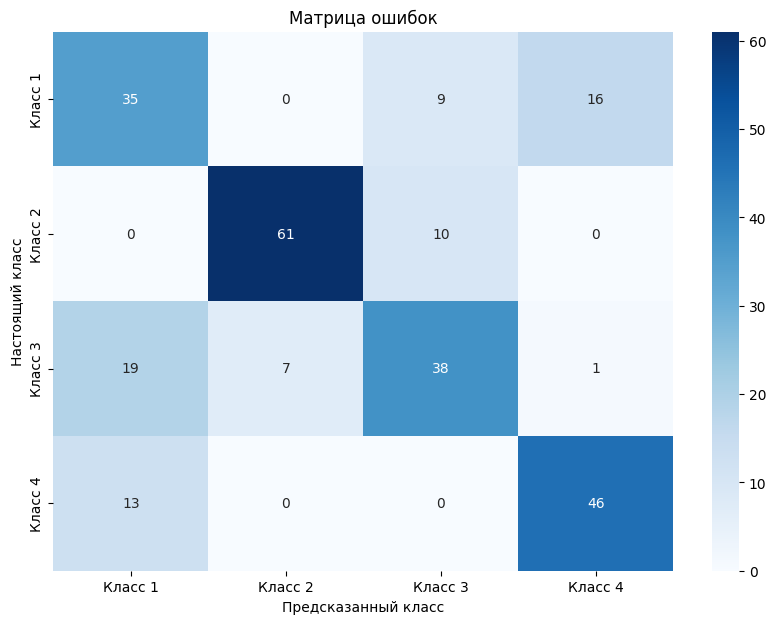

In [574]:
# Создание матрицы ошибок
plot_confusion_matrix(y_test_cls_base, y_test_pred_cls_base)

**Точность модели (Accuracy)** на валидационной выборке составляет 70.59% - достаточно высокая точность при предсказании одного из 4 классов.

In [575]:
# Проверка нулевой оценки точности

null_accuracy_base = (y_test_cls_base.value_counts().max()/y_test_cls_base.value_counts().sum())
print('Null accuracy score: {0:0.4f}'. format(null_accuracy_base))

Null accuracy score: 0.2784


Показатель точности модели составляет 0,7059, а нулевой показатель точности составляет 0,2784. Можно сделать вывод, что модель хорошо справляется с предсказанием меток ценовых классов.

### *Регрессия*

#### **a. Обучение модели из sklearn для выбранного набора данных**

In [576]:
# Разделение данных для регрессии
X_regression_base = df_base.drop(['Price', 'Price Class'], axis=1)
y_regression_base = df_base["Price"]
X_train_reg_base, X_test_reg_base, y_train_reg_base, y_test_reg_base = train_test_split(
    X_regression_base, y_regression_base, test_size=0.2, random_state=42
)

scaler = StandardScaler() # Стандартизация данных
# scaler = MinMaxScaler() # Нормализация данных
X_train_reg_scaled_base = scaler.fit_transform(X_train_reg_base)
X_test_reg_scaled_base = scaler.transform(X_test_reg_base)

# Обучение модели регрессии
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_reg_scaled_base, y_train_reg_base)

RandomForestRegressor(random_state=42)

#### **b. Оценка качества модели по выбранным метрикам на выбранном наборе данных**

In [577]:
y_test_pred_reg_base = rf_regressor.predict(X_test_reg_scaled_base)
y_train_pred_reg_base = rf_regressor.predict(X_train_reg_scaled_base)

# Вывод результатов
evaluate_regression(y_test_reg_base, y_test_pred_reg_base, 'Оценка на валидационной выборке:')

print()

evaluate_regression(y_train_reg_base, y_train_pred_reg_base, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
MAE = 0.1672
MAPE = 1.5469%
MSE = 0.0476
RMSE = 0.2183

Оценка на тренировочной выборке:
MAE = 0.0672
MAPE = 0.6198%
MSE = 0.0083
RMSE = 0.0909


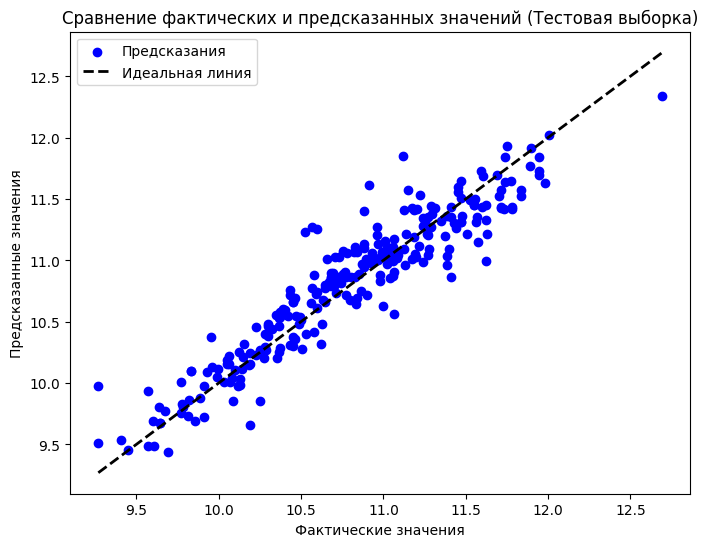

In [578]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_base, y_test_pred_reg_base)

MAPE (1.5469%) на валидационной выборке и MAE (0.1672) достаточно низкие, что говорит о том, что модель может быть использована для решения задач с определённой погрешностью.

## **3. Улучшение бейзлайна**

**a. b. c. Формирование гипотез и их проверка, а также формирование улучшенного бейзлайна по результатам проверки гипотез (препроцессинг данных, визуализация данных, формирование новых признаков, подбор гиперпараметров на кросс-валидации)**

### *Классификация*

**d. Обучение модели с улучшенным бейзлайном на выбранном наборе данных**

In [579]:
df_optimized = df_temp

# Подготовка данных для классификации
X_classification_optimized = df_optimized.drop(columns=['Price', 'Price Class'], axis=1)
y_classification_optimized = df_optimized['Price Class']

# Разделение на тренировочную и тестовую выборки
X_train_cls_optimized, X_test_cls_optimized, y_train_cls_optimized, y_test_cls_optimized = train_test_split(
    X_classification_optimized, y_classification_optimized, test_size=0.2, random_state=42
)


scaler = StandardScaler() # Стандартизация данных
# scaler = MinMaxScaler() # Нормализация данных
X_train_cls_scaled_optimized  = scaler.fit_transform(X_train_cls_optimized)
X_test_cls_scaled_optimized  = scaler.transform(X_test_cls_optimized)

# Обучение модели классификации
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_cls_scaled_optimized, y_train_cls_optimized)

RandomForestClassifier(random_state=42)

**e.	Оценка качества моделей с улучшенным бейзлайном по выбранным метрикам на выбранных наборах данных**

In [580]:
# Оценка модели классификации
y_pred_train_cls_optimized = rf_classifier.predict(X_train_cls_scaled_optimized)
y_pred_test_cls_optimized = rf_classifier.predict(X_test_cls_scaled_optimized)

# Вывод результатов
evaluate_classification(y_test_cls_optimized, y_pred_test_cls_optimized, 'Оценка на валидационной выборке:')

print()

evaluate_classification(y_train_cls_optimized, y_pred_train_cls_optimized, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
Accuracy = 0.7189112156862745
Balanced accuracy = 0.7151485300328263

Оценка на тренировочной выборке:
Accuracy = 0.9105211406096362
Balanced accuracy = 0.9097593957683999


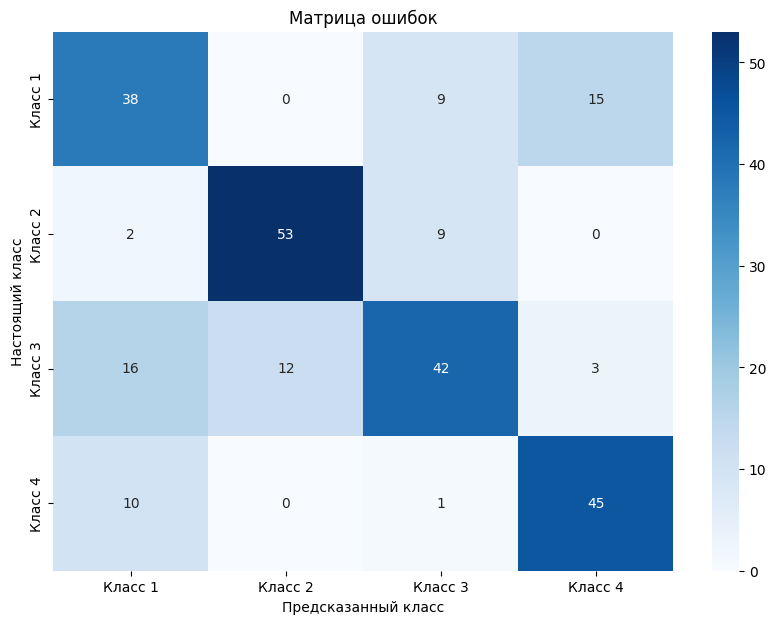

In [581]:
# Создание матрицы ошибок
plot_confusion_matrix(y_test_cls_optimized, y_pred_test_cls_optimized)

**f.	Сравнить результаты моделей с улучшенным бейзлайном в сравнении с результатами из пункта 2**

После улучшения бейзлайна на валидационной выборке модель стала работать примерно на 1,3% точнее, а на тренировочной примерно на 6% хуже, что говорит об уменьшении переобучения модели.

**g.	Сделать выводы**

Из проделанных действий и полученных результатов можно сделать вывод, что дублирующие данные, а также данные с низкой корреляцией относительно целевых столбцов и применение labelEncoder к столбцу HDD - всё это мешало модели и понижало точность, а все исправления в совокупности помогли случайному лесу обучиться правильнее и с большей точностью предсказывать ценовой класс ноутбука.

### *Регрессия*

**d. Обучение модели с улучшенным бейзлайном на выбранном наборе данных**

In [583]:
# Разделение данных для регрессии
X_regression_optimized = df_optimized.drop(['Price', 'Price Class'], axis=1)
y_regression_optimized = df_optimized["Price"]
X_train_reg_optimized, X_test_reg_optimized, y_train_reg_optimized, y_test_reg_optimized = train_test_split(
    X_regression_optimized, y_regression_optimized, test_size=0.2, random_state=42
)


scaler = StandardScaler() # Стандартизация
# scaler = MinMaxScaler() # Нормализация данных
X_train_reg_scaled_optimized = scaler.fit_transform(X_train_reg_optimized)
X_test_reg_scaled_optimized = scaler.transform(X_test_reg_optimized)

# Обучение модели регрессии
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_reg_scaled_optimized, y_train_reg_optimized)

RandomForestRegressor(random_state=42)

**e.	Оценка качества моделей с улучшенным бейзлайном по выбранным метрикам на выбранных наборах данных**

In [584]:
y_test_pred_reg_optimized = rf_regressor.predict(X_test_reg_scaled_optimized)
y_train_pred_reg_optimized = rf_regressor.predict(X_train_reg_scaled_optimized)

# Вывод результатов
evaluate_regression(y_test_reg_optimized, y_test_pred_reg_optimized, 'Оценка на валидационной выборке:')

print()

evaluate_regression(y_train_reg_optimized, y_train_pred_reg_optimized, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
MAE = 0.1514
MAPE = 1.5016%
MSE = 0.0397
RMSE = 0.1992

Оценка на тренировочной выборке:
MAE = 0.0626
MAPE = 0.6145%
MSE = 0.0071
RMSE = 0.0843


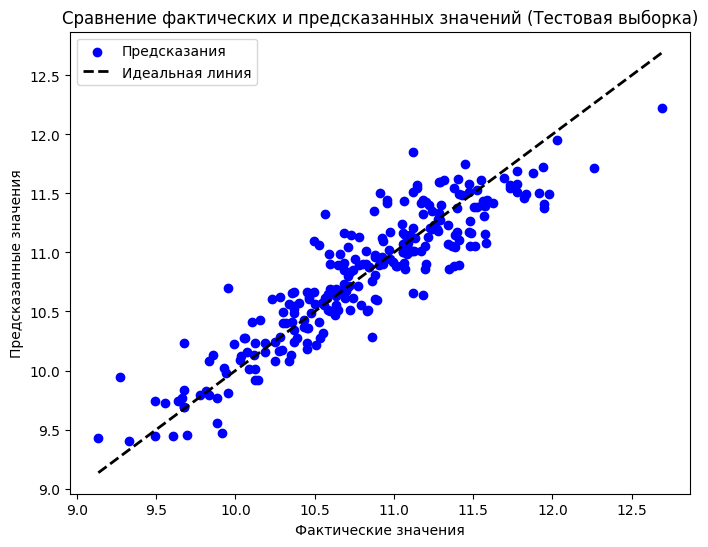

In [585]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_optimized, y_test_pred_reg_optimized)


**f.	Сравнить результаты моделей с улучшенным бейзлайном в сравнении с результатами из пункта 2**

На улучшенном бейзлайне модель показала следующие улучшения:

MAE уменьшилась с 0.1672 до 0.1514, что говорит о том, что в среднем ошибки предсказания стали меньше.

MAPE снизилась с 1.5469% до 1.5016%, что говорит о том, что модель стала предсказывать значения с меньшей относительной ошибкой.

MSE уменьшилась с 0.0476 до 0.0397, что подтверждает уменьшение величины ошибок, особенно крупных.

RMSE снизился с 0.2183 до 0.1992, что также подтверждает снижение ошибок, особенно в больших значениях.

Подводя итоги, можно сказать, что модель на улучшенном бейзлайне показала увеличение точности предсказаний во всех метриках и графики рассеиваний указывают на то что стало меньше выбросов и само множество точек стало более кучно располагаться около идеальной линии.

**g.	Сделать выводы**

Из проделанных действий и полученных результатов можно сделать вывод, что дублирующие данные, а также данные с низкой корреляцией относительно целевых столбцов и применение labelEncoder к столбцу HDD - всё это мешало модели и понижало точность, а все исправления в совокупности помогли случайному лесу обучиться правильнее и с большей точностью предсказывать ценовой класс ноутбука.

## **4.	Имплементация алгоритма машинного обучения**

**a. Самостоятельно имплементировать алгоритмы машинного обучения (для классификации и регрессии)**

In [586]:
import numpy as np
from collections import Counter

# Функция для вычисления энтропии (для классификации)
def entropy(y):
    class_counts = Counter(y)
    probabilities = np.array(list(class_counts.values())) / len(y)
    return -np.sum(probabilities * np.log2(probabilities))

# Функция для вычисления индекса Джини (для классификации)
def gini_impurity(y):
    class_counts = Counter(y)
    probabilities = np.array(list(class_counts.values())) / len(y)
    return 1 - np.sum(probabilities ** 2)

# Функция для вычисления MSE (для регрессии)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Функция для поиска наилучшего разбиения
def best_split(X, y, criterion='gini'):
    best_impurity = float('inf')
    best_split_info = None
    n_samples, n_features = X.shape

    for feature_idx in range(n_features):
        possible_splits = np.unique(X[:, feature_idx])

        for threshold in possible_splits:
            left_mask = X[:, feature_idx] <= threshold
            right_mask = ~left_mask
            y_left, y_right = y[left_mask], y[right_mask]

            # Пропуск разбиения, если хотя бы одна из частей пуста
            if len(y_left) == 0 or len(y_right) == 0:
                continue

            if criterion == 'gini':
                impurity = gini_impurity(y_left) * len(y_left) / n_samples + gini_impurity(y_right) * len(y_right) / n_samples
            elif criterion == 'entropy':
                impurity = entropy(y_left) * len(y_left) / n_samples + entropy(y_right) * len(y_right) / n_samples
            elif criterion == 'mse':  # Для задачи регрессии
                left_pred = np.mean(y_left)
                right_pred = np.mean(y_right)
                impurity = (np.mean((y_left - left_pred) ** 2) * len(y_left) + np.mean((y_right - right_pred) ** 2) * len(y_right)) / n_samples
            else:
                raise ValueError("Criterion must be 'gini', 'entropy' or 'mse'")

            if impurity < best_impurity:
                best_impurity = impurity
                best_split_info = (feature_idx, threshold)

    return best_split_info

# Рекурсивная функция для построения дерева
def build_tree(X, y, task='classification', max_depth=None, min_samples_split=2, depth=0, criterion='gini'):
    n_samples, n_features = X.shape
    unique_classes = np.unique(y)

    if len(unique_classes) == 1 or (max_depth and depth == max_depth) or n_samples < min_samples_split:
        if task == 'classification':
            return Counter(y).most_common(1)[0][0]  # Наиболее частый класс
        elif task == 'regression':
            return np.mean(y)  # Среднее значение для регрессии

    # Лучшее разбиение
    best_split_info = best_split(X, y, criterion)
    if not best_split_info:
        return np.mean(y) if task == 'regression' else Counter(y).most_common(1)[0][0]  # Если не удалось найти разбиение

    feature_idx, threshold = best_split_info
    left_mask = X[:, feature_idx] <= threshold
    right_mask = ~left_mask
    X_left, y_left = X[left_mask], y[left_mask]
    X_right, y_right = X[right_mask], y[right_mask]

    # Рекурсивное построение дерева
    left_node = build_tree(X_left, y_left, task, max_depth, min_samples_split, depth+1, criterion)
    right_node = build_tree(X_right, y_right, task, max_depth, min_samples_split, depth+1, criterion)

    return (feature_idx, threshold, left_node, right_node)

# Функция для предсказания с использованием дерева
def predict_tree(tree, X):
    if isinstance(tree, tuple):
        feature_idx, threshold, left_node, right_node = tree
        if X[feature_idx] <= threshold:
            return predict_tree(left_node, X)
        else:
            return predict_tree(right_node, X)
    else:
        return tree  # Предсказание (класс или значение)

# Функция для обучения и предсказания с деревом решений
def decision_tree(X_train, y_train, X_test, task='classification', max_depth=None, min_samples_split=2, criterion='gini'):
    tree = build_tree(X_train, y_train, task, max_depth, min_samples_split, criterion=criterion)
    y_pred = np.array([predict_tree(tree, x) for x in X_test])
    return y_pred

# Реализация случайного леса
def random_forest(X_train, y_train, X_test, n_estimators=100, max_depth=None, min_samples_split=2, criterion='gini', task='classification', max_features=None):
    n_samples, n_features = X_train.shape
    predictions = []

    if max_features is None:
        max_features = n_features  # Если не задано, используются все признаки

    for _ in range(n_estimators):
        # Случайный выбор подмножества данных
        indices = np.random.choice(n_samples, size=n_samples, replace=True)
        X_bootstrap = X_train[indices]
        y_bootstrap = y_train.iloc[indices]

        # Случайный выбор подмножества признаков
        features = np.random.choice(n_features, size=max_features, replace=False)
        X_bootstrap = X_bootstrap[:, features]

        # Построение дерева для каждого подмножества
        tree = build_tree(X_bootstrap, y_bootstrap, task=task, max_depth=max_depth, min_samples_split=min_samples_split, criterion=criterion)

        X_test_selected_features = X_test[:, features]
        tree_preds = np.array([predict_tree(tree, x) for x in X_test_selected_features])
        predictions.append(tree_preds)

    predictions = np.array(predictions).T  # Транспонирование

    # Аггрегация предсказаний
    if task == 'classification':
        # Классификация: голосование за наиболее частое значение
        final_preds = [Counter(preds).most_common(1)[0][0] for preds in predictions]
    elif task == 'regression':
        # Регрессия: усреднение предсказания
        final_preds = np.mean(predictions, axis=1)

    return np.array(final_preds)

#### *Классификация*

**b. Обучить имплементированную модель для выбранного набора данных**

In [587]:
y_pred_base = random_forest(X_train_cls_scaled_base, y_train_cls_base, X_test_cls_scaled_base, n_estimators=10, max_depth=10, criterion='entropy', task='classification')

**c. Оценить качество имплементированной модели по выбранным метрикам на выбранном наборе данных**

In [588]:
evaluate_classification(y_test_cls_base, y_pred_base, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
Accuracy = 0.6914593725490196
Balanced accuracy = 0.6900175763752441


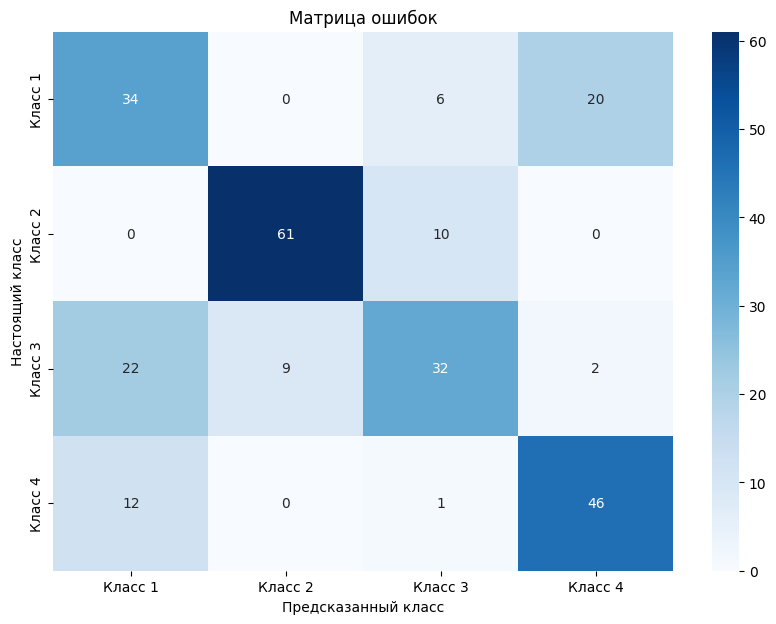

In [589]:
# Матрица ошибок
plot_confusion_matrix(y_test_cls_base, y_pred_base)

**d. Сравнить результаты имплементированных моделей в сравнении с результатами из пункта 2**

Точность и сбалансированная точность получились практически идентичными с моделью sklearn.

Суммарно классы стали на несколько раз реже угадываться.

**e.	Сделать выводы**

Исходя из полученных результатов на данном набое данных, можно сделать вывод, что самостоятельная имплементация классификации с использованием случайного леса работает примерно с той же точностью, что и реализация sklearn.

**f.	Добавить техники из улучшенного бейзлайна (пункт 3с)**

Обучение модели на уже улучшенных данных.

**g.	Обучить модели для выбранного набора данных**

In [590]:
y_pred_optimized = random_forest(X_train_cls_scaled_optimized, y_train_cls_optimized, X_test_cls_scaled_optimized, n_estimators=100, max_depth=10, criterion='gini', task='classification')

**h.	Оценить качество модели по выбранным метрикам на выбранном наборе данных**

In [591]:
evaluate_classification(y_test_cls_optimized, y_pred_optimized, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
Accuracy = 0.7097119411764706
Balanced accuracy = 0.7031918189034783


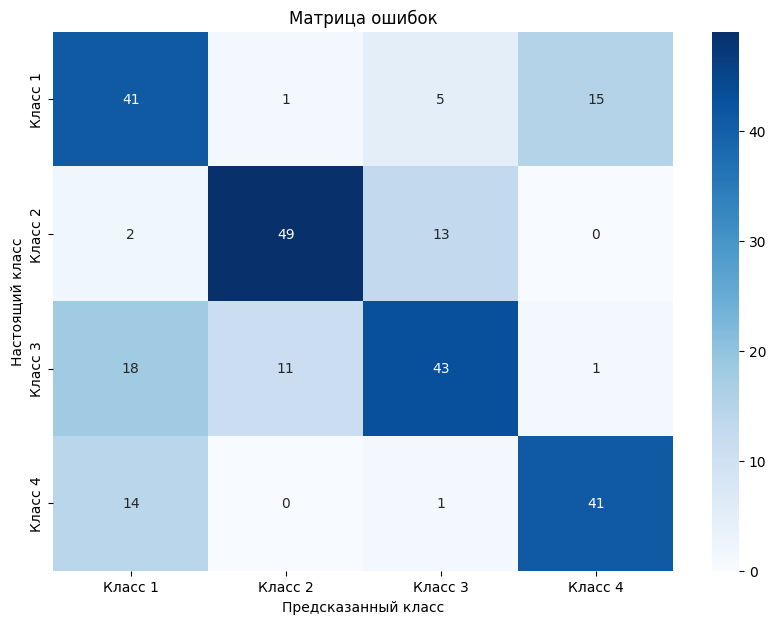

In [592]:
# Матрица ошибок
plot_confusion_matrix(y_test_cls_optimized, y_pred_optimized)

**i.	Сравнить результаты модели в сравнении с результатами из пункта 3**

Точность и сбалансированная ухудшились примерно на 0,01 по сравнению с моделью sklearn.

Класс 1 стал на 3 раза чаще угадываться правильно, класс 2 - на 4 раза реже, класс 3 - на 1 раз чаще, класс 4 - на 4 раза реже.

**j.	Сделать выводы**

Исходя из полученных результатов на данном набое данных, можно сделать вывод, что самостоятельная имплементация классификации с использованием случайного леса работает примерно с той же точностью, что и реализация sklearn на улучшенном бейзлайне.

#### *Регрессия*

**b. Обучить имплементированную модель для выбранного набора данных**

In [593]:
y_pred_base = random_forest(X_train_reg_scaled_base, y_train_reg_base, X_test_reg_scaled_base, n_estimators=10, max_depth=10, criterion='mse', task='regression')

**c. Оценить качество имплементированной модели по выбранным метрикам на выбранном наборе данных**

In [594]:
evaluate_regression(y_test_reg_base, y_pred_base, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
MAE = 0.1807
MAPE = 1.6718%
MSE = 0.0522
RMSE = 0.2285


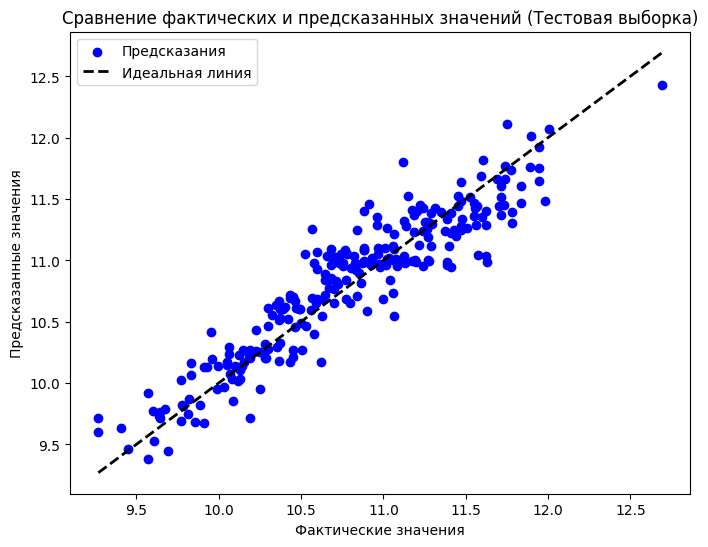

In [595]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_base, y_pred_base)

**d. Сравнить результаты имплементированных моделей в сравнении с результатами из пункта 2**

Исходя из полученных данных видно следующее:

MAE изменилась с 0.1672 до 0.1807; MAPE изменилась с 1.5469% до 1.6718%; MSE изменилась с 0.0476 до 0.0522; RMSE изменилась с 0.2183 до 0.2285.

Можно сказать, что все метрики немного ухудшились, однако кучность точек на диаграммах рассеивания практически не изменилась, новых выбросов не добавилось.

**e.	Сделать выводы**

Исходя из полученных результатов на данном набое данных, можно сделать вывод, что самостоятельная имплементация регрессии с использованием случайного леса работает примерно с той же точностью, что и реализация sklearn.

**f.	Добавить техники из улучшенного бейзлайна (пункт 3с)**

Обучение модели на уже улучшенных данных.

**g.	Обучить модели для выбранного набора данных**

In [596]:
y_pred_optimized = random_forest(X_train_reg_scaled_optimized, y_train_reg_optimized, X_test_reg_scaled_optimized, n_estimators=100, max_depth=10, criterion='mse', task='regression')

**h.	Оценить качество модели по выбранным метрикам на выбранном наборе данных**

In [597]:
evaluate_regression(y_test_reg_optimized, y_pred_optimized, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
MAE = 0.1601
MAPE = 1.5214%
MSE = 0.0426
RMSE = 0.2064


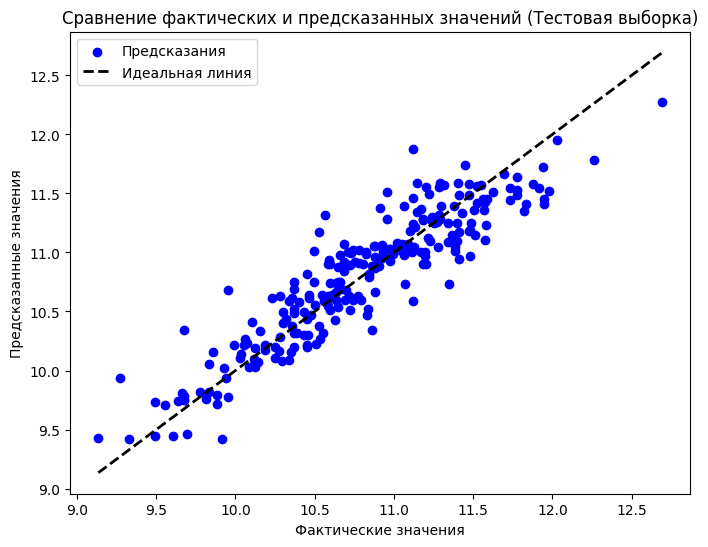

In [598]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_optimized, y_pred_optimized)

**i.	Сравнить результаты модели в сравнении с результатами из пункта 3**

Исходя из полученных данных видно следующее:

MAE с 0.1514 до 0.1601; MAPE изменилась с 1.5016% до 1.5214%; MSE изменилась с 0.0397 до 0.0426; RMSE изменилась с 0.1992 до 0.2063.

Можно сказать, что все метрики немного ухудшились, однако кучность точек на диаграммах рассеивания практически не изменилась и новых вбросов не добавилось.

**j.	Сделать выводы**

Исходя из полученных результатов на данном набое данных, можно сделать вывод, что самостоятельная имплементация регрессии с использованием случайного леса работает примерно с той же точностью, что и реализация sklearn на улучшенном бейзлайне.

# **Лабораторная работа 5**

# **Проведение исследований с градиентным бустингом**

## **2. Создание бейзлайна и оценка качества**

In [599]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [600]:
df_base = df.copy()

### Классификация

#### **a. Обучение модели из sklearn для выбранного набора данных**

In [601]:
# Разделение данных для классификации
X_classification_base = df_base.drop(["Price", "Price Class"], axis=1)
y_classification_base = df_base["Price Class"]
X_train_cls_base, X_test_cls_base, y_train_cls_base, y_test_cls_base = train_test_split(
    X_classification_base, y_classification_base, test_size=0.2, random_state=42
)


scaler = StandardScaler() # Стандартизация данных
# scaler = MinMaxScaler() # Нормализация данных
X_train_cls_scaled_base = scaler.fit_transform(X_train_cls_base)
X_test_cls_scaled_base = scaler.transform(X_test_cls_base)

# Обучение модели классификации
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train_cls_scaled_base, y_train_cls_base)

GradientBoostingClassifier(random_state=42)

#### **b. Оценка качества модели по выбранным метрикам на выбранном наборе данных**

In [602]:
y_test_pred_cls_base = gb_classifier.predict(X_test_cls_scaled_base)
y_train_pred_cls_base = gb_classifier.predict(X_train_cls_scaled_base)

# Вывод результатов
evaluate_classification(y_test_cls_base, y_test_pred_cls_base, 'Оценка на валидационной выборке:')

print()

evaluate_classification(y_train_cls_base, y_train_pred_cls_base, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
Accuracy = 0.6901960784313725
Balanced accuracy = 0.6823436380997852

Оценка на тренировочной выборке:
Accuracy = 0.8575638506876228
Balanced accuracy = 0.8581775734287902


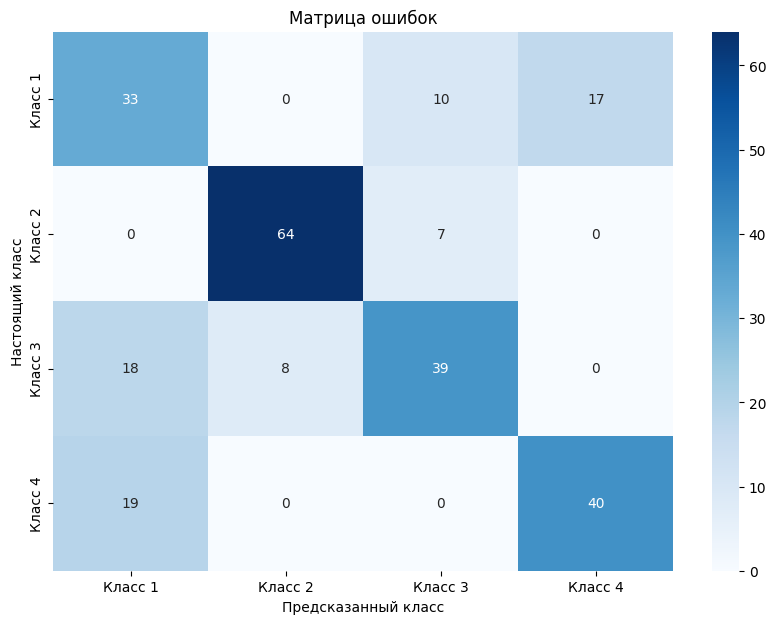

In [603]:
# Матрица ошибок
plot_confusion_matrix(y_test_cls_base, y_test_pred_cls_base)

**Точность модели (Accuracy)** на валидационной выборке составляет 69.02% - достаточно высокая точность при предсказании одного из 4 классов.

In [604]:
# Проверка нулевой оценки точности

null_accuracy_base = (y_test_cls_base.value_counts().max()/y_test_cls_base.value_counts().sum())
print('Null accuracy score: {0:0.4f}'. format(null_accuracy_base))

Null accuracy score: 0.2784


Показатель точности модели составляет 0,6902, а нулевой показатель точности составляет 0,2784. Можно сделать вывод, что модель хорошо справляется с предсказанием меток ценовых классов.

### *Регрессия*

#### **a. Обучение модели из sklearn для выбранного набора данных**

In [605]:
# Разделение данных для регрессии
X_regression_base = df_base.drop(['Price', 'Price Class'], axis=1)
y_regression_base = df_base["Price"]
X_train_reg_base, X_test_reg_base, y_train_reg_base, y_test_reg_base = train_test_split(
    X_regression_base, y_regression_base, test_size=0.2, random_state=42
)

scaler = StandardScaler() # Стандартизация данных
# scaler = MinMaxScaler() # Нормализация данных
X_train_reg_scaled_base = scaler.fit_transform(X_train_reg_base)
X_test_reg_scaled_base = scaler.transform(X_test_reg_base)

# Обучение модели регрессии
gb_regressor = GradientBoostingRegressor(random_state=42)
gb_regressor.fit(X_train_reg_scaled_base, y_train_reg_base)

GradientBoostingRegressor(random_state=42)

#### **b. Оценка качества модели по выбранным метрикам на выбранном наборе данных**

In [606]:
y_test_pred_reg_base = gb_regressor.predict(X_test_reg_scaled_base)
y_train_pred_reg_base = gb_regressor.predict(X_train_reg_scaled_base)

# Вывод результатов
evaluate_regression(y_test_reg_base, y_test_pred_reg_base, 'Оценка на валидационной выборке:')

print()

evaluate_regression(y_train_reg_base, y_train_pred_reg_base, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
MAE = 0.1798
MAPE = 1.6650%
MSE = 0.0533
RMSE = 0.2308

Оценка на тренировочной выборке:
MAE = 0.1436
MAPE = 1.3276%
MSE = 0.0338
RMSE = 0.1839


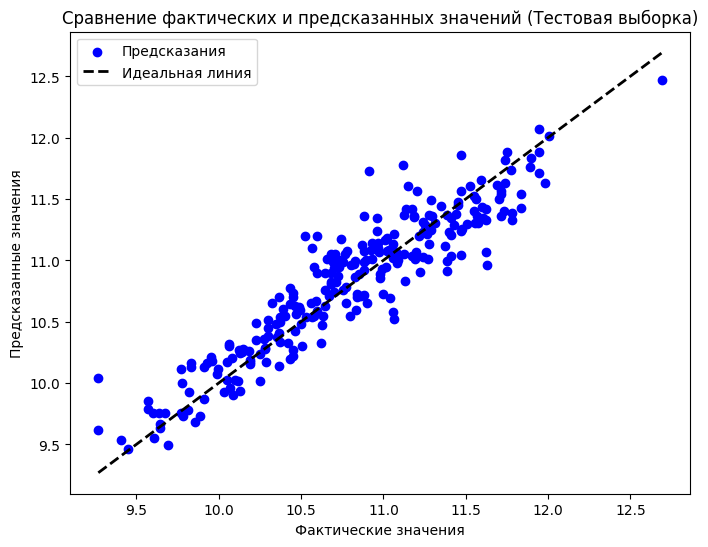

In [607]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_base, y_test_pred_reg_base)

MAPE (1.6650%) на валидационной выборке и MAE (0.1798) достаточно низкие, что говорит о том, что модель может быть использована для решения задач с определённой погрешностью.

## **3. Улучшение бейзлайна**

**a. b. c. Формирование гипотез и их проверка, а также формирование улучшенного бейзлайна по результатам проверки гипотез (препроцессинг данных, визуализация данных, формирование новых признаков, подбор гиперпараметров на кросс-валидации)**

### *Классификация*

**d. Обучение модели с улучшенным бейзлайном на выбранном наборе данных**

In [609]:
df_optimized = df_temp

# Подготовка данных для классификации
X_classification_optimized = df_optimized.drop(columns=['Price', 'Price Class'], axis=1)
y_classification_optimized = df_optimized['Price Class']

# Разделение на тренировочную и тестовую выборки
X_train_cls_optimized, X_test_cls_optimized, y_train_cls_optimized, y_test_cls_optimized = train_test_split(
    X_classification_optimized, y_classification_optimized, test_size=0.2, random_state=42
)


scaler = StandardScaler() # Стандартизация данных
# scaler = MinMaxScaler() # Нормализация данных
X_train_cls_scaled_optimized  = scaler.fit_transform(X_train_cls_optimized)
X_test_cls_scaled_optimized  = scaler.transform(X_test_cls_optimized)

# Обучение модели классификации
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train_cls_scaled_optimized, y_train_cls_optimized)

GradientBoostingClassifier(random_state=42)

**e.	Оценка качества моделей с улучшенным бейзлайном по выбранным метрикам на выбранных наборах данных**

In [610]:
# Оценка модели классификации
y_pred_train_cls_optimized = gb_classifier.predict(X_train_cls_scaled_optimized)
y_pred_test_cls_optimized = gb_classifier.predict(X_test_cls_scaled_optimized)

# Вывод результатов
evaluate_classification(y_test_cls_optimized, y_pred_test_cls_optimized, 'Оценка на валидационной выборке:')

print()

evaluate_classification(y_train_cls_optimized, y_pred_train_cls_optimized, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
Accuracy = 0.6998165098039216
Balanced accuracy = 0.6890318240641373

Оценка на тренировочной выборке:
Accuracy = 0.8141592920353983
Balanced accuracy = 0.8130331414876015


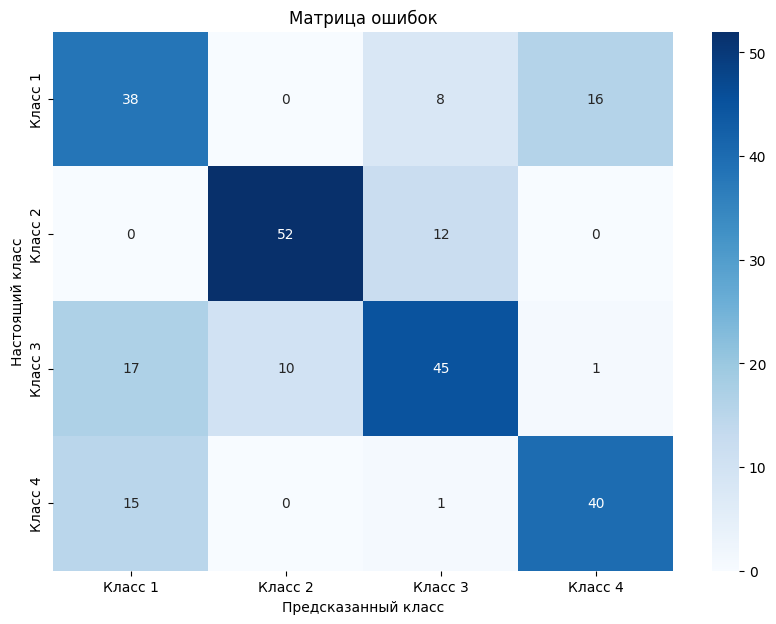

In [611]:
# Создание матрицы ошибок
plot_confusion_matrix(y_test_cls_optimized, y_pred_test_cls_optimized)

**f.	Сравнить результаты моделей с улучшенным бейзлайном в сравнении с результатами из пункта 2**

После улучшения бейзлайна на валидационной выборке модель стала работать примерно на 0,9% точнее, а на тренировочной примерно на 3,5% хуже, что говорит об уменьшении переобучения модели.

**g.	Сделать выводы**

Из проделанных действий и полученных результатов можно сделать вывод, что дублирующие данные, а также данные с низкой корреляцией относительно целевых столбцов и применение labelEncoder к столбцу HDD - всё это мешало модели и понижало точность, а все исправления в совокупности помогли градиентному бустингу обучиться правильнее и с большей точностью предсказывать ценовой класс ноутбука.

### *Регрессия*

**d. Обучение модели с улучшенным бейзлайном на выбранном наборе данных**

In [612]:
# Разделение данных для регрессии
X_regression_optimized = df_optimized.drop(['Price', 'Price Class'], axis=1)
y_regression_optimized = df_optimized["Price"]
X_train_reg_optimized, X_test_reg_optimized, y_train_reg_optimized, y_test_reg_optimized = train_test_split(
    X_regression_optimized, y_regression_optimized, test_size=0.2, random_state=42
)


scaler = StandardScaler() # Стандартизация
# scaler = MinMaxScaler() # Нормализация данных
X_train_reg_scaled_optimized = scaler.fit_transform(X_train_reg_optimized)
X_test_reg_scaled_optimized = scaler.transform(X_test_reg_optimized)

# Обучение модели регрессии
gb_regressor = GradientBoostingRegressor(random_state=42)
gb_regressor.fit(X_train_reg_scaled_optimized, y_train_reg_optimized)

GradientBoostingRegressor(random_state=42)

**e.	Оценка качества моделей с улучшенным бейзлайном по выбранным метрикам на выбранных наборах данных**

In [613]:
y_test_pred_reg_optimized = gb_regressor.predict(X_test_reg_scaled_optimized)
y_train_pred_reg_optimized = gb_regressor.predict(X_train_reg_scaled_optimized)

# Вывод результатов
evaluate_regression(y_test_reg_optimized, y_test_pred_reg_optimized, 'Оценка на валидационной выборке:')

print()

evaluate_regression(y_train_reg_optimized, y_train_pred_reg_optimized, 'Оценка на тренировочной выборке:')

Оценка на валидационной выборке:
MAE = 0.1744
MAPE = 1.6501%
MSE = 0.0488
RMSE = 0.2209

Оценка на тренировочной выборке:
MAE = 0.1401
MAPE = 1.2994%
MSE = 0.0321
RMSE = 0.1792


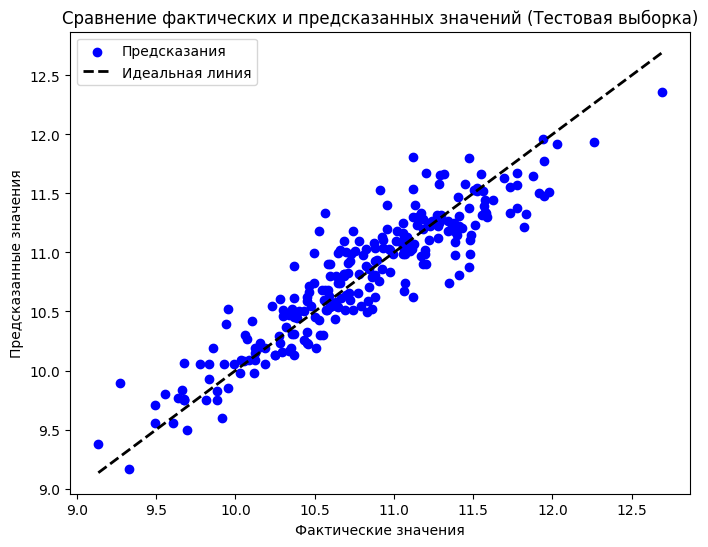

In [614]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_optimized, y_test_pred_reg_optimized)


**f.	Сравнить результаты моделей с улучшенным бейзлайном в сравнении с результатами из пункта 2**

На улучшенном бейзлайне модель показала следующие улучшения:

MAE уменьшилась с 0.1798 до 0.1744, что говорит о том, что в среднем ошибки предсказания стали меньше.

MAPE снизилась с 1.6650% до 1.6501%, что говорит о том, что модель стала предсказывать значения с меньшей относительной ошибкой.

MSE уменьшилась с 0.0533 до 0.0488, что подтверждает уменьшение величины ошибок, особенно крупных.

RMSE снизился с 0.2308 до 0.2209, что также подтверждает снижение ошибок, особенно в больших значениях.

Подводя итоги, можно сказать, что модель на улучшенном бейзлайне показала увеличение точности предсказаний во всех метриках, выбросов стало меньше, множество точек стало более кучно располагаться около идеальной линии.

**g.	Сделать выводы**

Из проделанных действий и полученных результатов можно сделать вывод, что дублирующие данные, а также данные с низкой корреляцией относительно целевых столбцов и применение labelEncoder к столбцу HDD - всё это мешало модели и понижало точность, а все исправления в совокупности помогли градиентному бустингу обучиться правильнее и с большей точностью предсказывать ценовой класс ноутбука.

## **4.	Имплементация алгоритма машинного обучения**

**a. Самостоятельно имплементировать алгоритмы машинного обучения (для классификации и регрессии)**

In [615]:
import numpy as np
from collections import Counter

# Функция для градиентного бустинга с поддержкой классификации и регрессии
def gradient_boosting(X_train, y_train, X_test, task='classification', n_estimators=100, learning_rate=0.1, max_depth=None, min_samples_split=2, criterion='gini'):
    if task == 'classification':
        # Преобразование меток классов в числовые значения для классификации
        class_map = {label: idx for idx, label in enumerate(np.unique(y_train))}
        y_train_num = np.array([class_map[label] for label in y_train])
    elif task == 'regression':
        y_train_num = np.array(y_train)
    else:
        raise ValueError("Task must be 'classification' or 'regression'")

    # Инициализация прогнозов
    if task == 'classification':
        # Инициализация с вероятностями классов (среднее по меткам)
        y_pred_train = np.full_like(y_train_num, np.mean(y_train_num), dtype=float)
        y_pred_test = np.full_like(np.zeros(X_test.shape[0]), np.mean(y_train_num), dtype=float)
    elif task == 'regression':
        # Инициализация с нулями для регрессии
        y_pred_train = np.zeros_like(y_train_num, dtype=float)
        y_pred_test = np.zeros_like(np.zeros(X_test.shape[0]), dtype=float)

    # Построение деревьев
    trees = []

    for _ in range(n_estimators):
        # Построение текущего дерева на основе ошибок текущих предсказаний
        residuals = y_train_num - y_pred_train
        tree = build_tree(X_train, residuals, task='regression', max_depth=max_depth, min_samples_split=min_samples_split, criterion='mse')
        trees.append(tree)

        # Обновление предсказаний
        for i, x in enumerate(X_train):
            y_pred_train[i] += learning_rate * predict_tree(tree, x)

        # Обновление предсказаний для тестовых данных
        for i, x in enumerate(X_test):
            y_pred_test[i] += learning_rate * predict_tree(tree, x)

    # Возврат предсказаний для тестовой выборки
    if task == 'classification':
        # Возврат вероятности классов (классы) для классификации
        y_pred_test_classes = np.round(y_pred_test).astype(int)
        reverse_class_map = {v: k for k, v in class_map.items()}
        y_pred_test_labels = [reverse_class_map[label] for label in y_pred_test_classes]
        return np.array(y_pred_test_labels)

    elif task == 'regression':
        # Возврат предсказанных значений для регрессии
        return y_pred_test

#### *Классификация*

**b. Обучить имплементированную модель для выбранного набора данных**

In [616]:
y_pred_base = gradient_boosting(X_train_cls_scaled_base, y_train_cls_base, X_test_cls_scaled_base, task='classification', n_estimators=100, learning_rate=0.1)

**c. Оценить качество имплементированной модели по выбранным метрикам на выбранном наборе данных**

In [617]:
evaluate_classification(y_test_cls_base, y_pred_base, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
Accuracy = 0.6431372549019608
Balanced accuracy = 0.6369375531765123


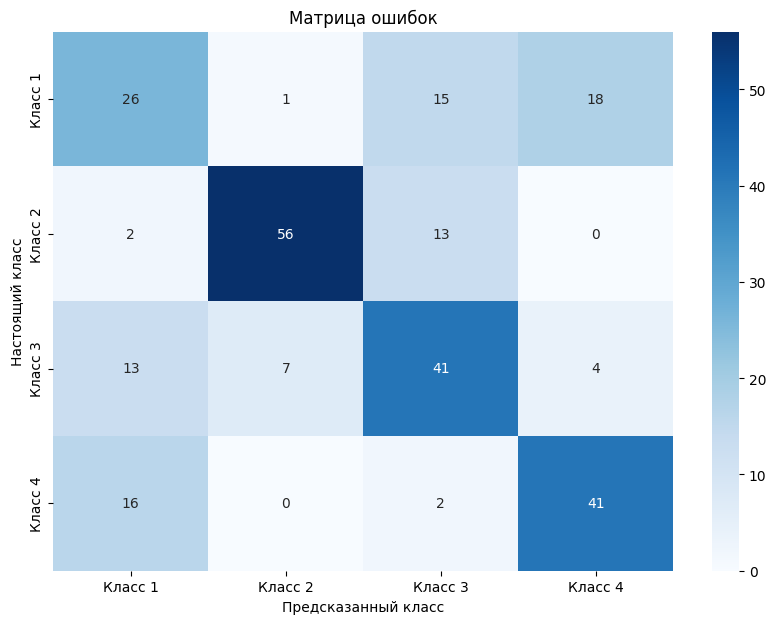

In [618]:
# Создание матрицы ошибок
plot_confusion_matrix(y_test_cls_base, y_pred_base)

**d. Сравнить результаты имплементированных моделей в сравнении с результатами из пункта 2**

Точность и сбалансированная стали хуже на 0.047 по сравнению с моделью sklearn.

Класс 1 стал на 7 раз реже угадываться правильно, класс 2 - на 8 раз реже, класс 3 - на 2 раза чаще, класс 4 - на 1 раз чаще.

**e.	Сделать выводы**

Исходя из полученных результатов на данном набое данных, можно сделать вывод, что самостоятельная имплементация классификации с использованием градиентного бустинга работает примерно с той же точностью, что и реализация sklearn.

**f.	Добавить техники из улучшенного бейзлайна (пункт 3с)**

Обучение модели на уже улучшенных данных.

**g.	Обучить модели для выбранного набора данных**

In [619]:
y_pred_optimized = gradient_boosting(X_train_cls_scaled_optimized, y_train_cls_optimized, X_test_cls_scaled_optimized, task='classification', n_estimators=100, learning_rate=0.1)

**h.	Оценить качество модели по выбранным метрикам на выбранном наборе данных**

In [620]:
evaluate_classification(y_test_cls_optimized, y_pred_optimized, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
Accuracy = 0.6532038431372549
Balanced accuracy = 0.6458133586263494


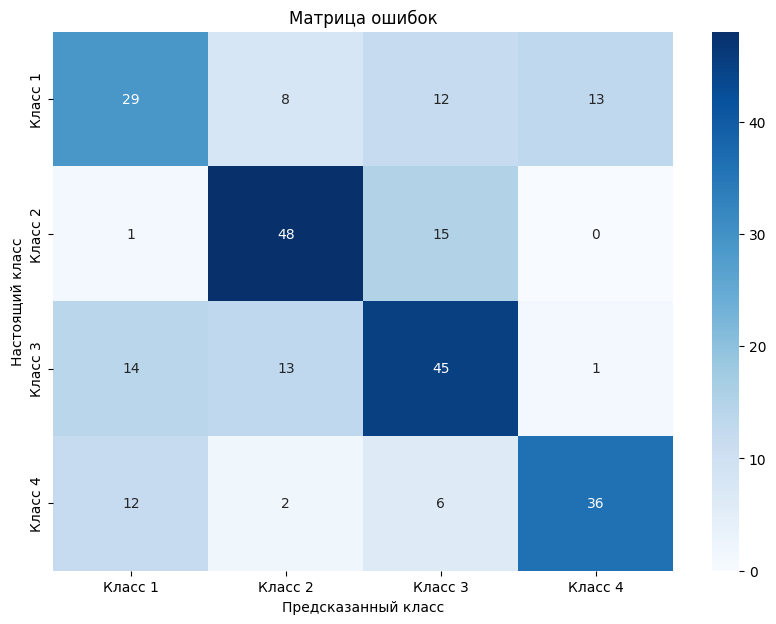

In [621]:
# Создание матрицы ошибок
plot_confusion_matrix(y_test_cls_optimized, y_pred_optimized)

**i.	Сравнить результаты модели в сравнении с результатами из пункта 3**

Точность и сбалансированная точность получились примерно на 0,044 хуже, чем у модели sklearn.

Класс 1 стал на 9 раз реже угадываться правильно, класс 2 - на 4 раза реже, класс 3 - на 4 раза реже, класс 4 - не изменился.

**j.	Сделать выводы**

Исходя из полученных результатов на данном набое данных, можно сделать вывод, что самостоятельная имплементация классификации с использованием градиентного бустинга работает примерно с той же точностью, что и реализация sklearn на улучшенном бейзлайне.

#### *Регрессия*

**b. Обучить имплементированную модель для выбранного набора данных**

In [622]:
y_pred_base = gradient_boosting(X_train_reg_scaled_base, y_train_reg_base, X_test_reg_scaled_base, task='classification', n_estimators=100, learning_rate=0.1)

**c. Оценить качество имплементированной модели по выбранным метрикам на выбранном наборе данных**

In [623]:
evaluate_regression(y_test_reg_base, y_pred_base, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
MAE = 0.2014
MAPE = 1.8646%
MSE = 0.0710
RMSE = 0.2664


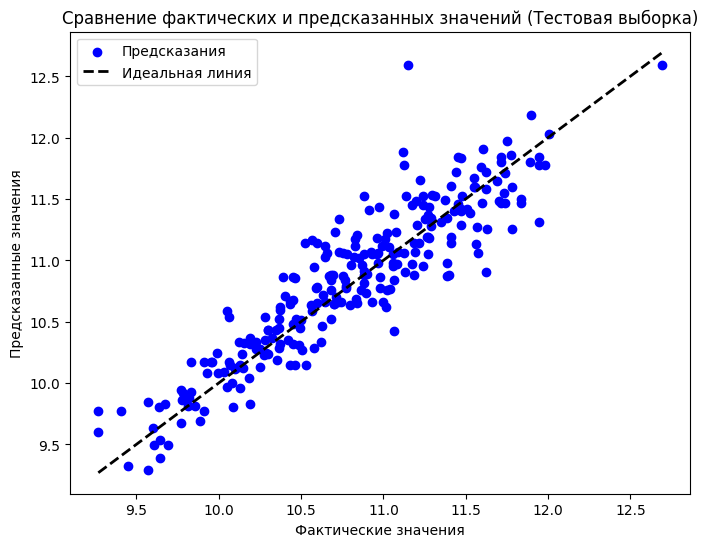

In [624]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_base, y_pred_base)

**d. Сравнить результаты имплементированных моделей в сравнении с результатами из пункта 2**

Исходя из полученных данных видно следующее:

MAE изменилась с 0.1798 до 0.2014; MAPE изменилась с 1.6650% до 1.8646%; MSE изменилась с 0.0533 до 0.0710; RMSE изменилась с 0.2308 до 0.2664.

Можно сказать, что все метрики немного ухудшились, однако кучность точек на диаграммах рассеивания практически не изменилась.

**e.	Сделать выводы**

Исходя из полученных результатов на данном набое данных, можно сделать вывод, что самостоятельная имплементация регрессии с использованием градиентного бустинга работает примерно с той же точностью, что и реализация sklearn.

**f.	Добавить техники из улучшенного бейзлайна (пункт 3с)**

Обучение модели на уже улучшенных данных.

**g.	Обучить модели для выбранного набора данных**

In [625]:
y_pred_optimized = gradient_boosting(X_train_reg_scaled_optimized, y_train_reg_optimized, X_test_reg_scaled_optimized, task='classification', n_estimators=100, learning_rate=0.1)

**h.	Оценить качество модели по выбранным метрикам на выбранном наборе данных**

In [626]:
evaluate_regression(y_test_reg_optimized, y_pred_optimized, 'Точность на валидационной выборке:')

Точность на валидационной выборке:
MAE = 0.1531
MAPE = 1.3752%
MSE = 0.0411
RMSE = 0.2027


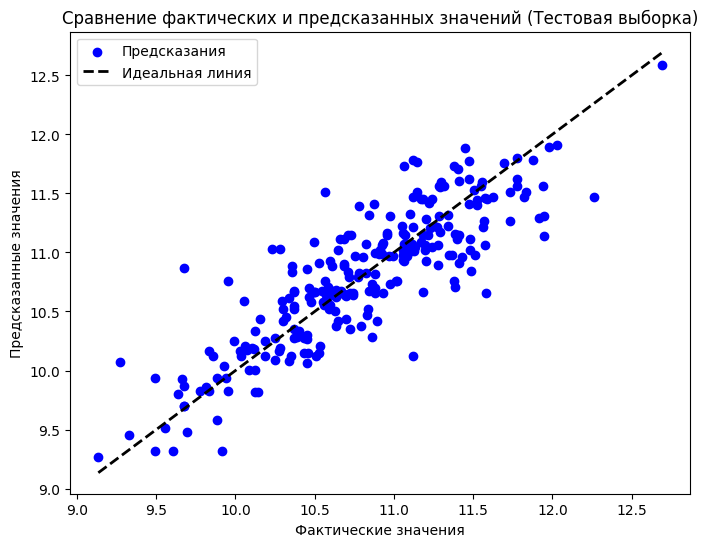

In [627]:
# Диаграмма рассеивания на тестовой выборке
plot_scattering_diagram(y_test_reg_optimized, y_pred_optimized)

**i.	Сравнить результаты модели в сравнении с результатами из пункта 3**

Исходя из полученных данных видно следующее:

MAE с 0.1744 до 0.1531; MAPE изменилась с 1.6501% до 1.3752%; MSE изменилась с 0.0488 до 0.0411; RMSE изменилась с 0.2209 до 0.2027.

Можно сказать, что все метрики немного улучшились, кучность точек на диаграммах рассеивания практически не изменилась.

**j.	Сделать выводы**

Исходя из полученных результатов на данном набое данных, можно сделать вывод, что самостоятельная имплементация регрессии с использованием градиентного бустинга работает примерно с той же точностью, что и реализация sklearn на улучшенном бейзлайне.

# Подведение итогов

Ниже в таблице в ячейках, относящихся к классификации, отображается **точность**. В ячейках, относящихся к регрессии, отбражается **MAE** и в скобках (**MAPE**).

|Алгоритм|    Задача   |Бейзлайн|Улучшенный бейзлайн|Самостоятельная имплементация алгоритма|
|:------:|:-----------:|:------:|:-----------------:|:-------------------------------------:|
|KNN     |классификация|0.6588  |0.7020             |0.6745                                 |
|        |регрессия    |0.2174 <br> (2.0093%)|0.2163 <br> (1.9984%)|0.2146 <br> (1.9812%)|
|Линейные модели|классификация|0.5922  |0.5952             |0.6039                                 |
|        |регрессия    |0.2948 <br> (2.7515%)|0.2912 <br> (2.6234%)|0.2989 <br> (2.7966%)|
|Решающее дерево|классификация|0.6588  |0.6601              |0.6589                                   |
|        |регрессия    |0.1985 <br> (1.8429%)|0.1867 <br> (1.7812%)|0.1805 <br> (1.7264%)|
|Случайный лес  |классификация|**0.7059**  |**0.7189**           |**0.7097**                                  |
|        |регрессия    |**0.1672 <br> (1.5469%)**|**0.1514 <br> (1.5016%)**|0.1601 <br> (1.5214%)|
|Градиентный бустинг|классификация|0.6901  |0.6998       |0.6532                                 |
|        |регрессия    |0.1798 <br> (1.6650%)|0.1744 <br> (1.6501%)|**0.1531 <br> (1.3752%)**|

<br><br>
Подводя итоги, можно выделить следующие алгоритмы, с помощью которых обученные модели показали лучший результат:
<br>

**Классификация**

|Бейзлайн|      Улучшенный бейзлайн|        Самостоятельная имплементация алгоритма|
|:------:|:-----------------:|:-------------------------------------:|
|Случайный лес      |Случайный лес|     Случайный лес|

<br>

**Регрессия**

|Бейзлайн|      Улучшенный бейзлайн|        Самостоятельная имплементация алгоритма|
|:------:|:-----------------:|:-------------------------------------:|
|Случайный лес      |Случайный лес|     Градиентный бустинг|

<br>

Наилучшие результаты показал алгоритм "Случайный лес". Алгоритм способен работать с нелинейными зависимостями, достаточно устойчив к выбросам, хорошо работает с данными, где много признаков, даже если только небольшая часть из них действительно влияет на целевую переменную, а также объединяет результаты нескольких деревьев решений, что снижает вероятность ошибок - всё это сказалось на итоговом результате, который оказался лучше остальных.

Хуже всех остальных результат оказался у линейных моделей. Главным недостатком алгоритма является то, что линейные модели предполагают линейную зависимость между входными признаками и целевой переменной, в то время как в предложенных данных зависимости могли быть и нелинейными, и алгоритм не может их адекватно уловить без дополнительных преобразований. Также они очень чувствительны к выбросам, что и сказалось на полученном результате.